In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import requests

file = 'StreamingHistory0.json'
df = pd.read_json(file)

In [3]:
df

,endTime,artistName,trackName,msPlayed
0,2019-12-06 17:31,"Tyler, The Creator",EARFQUAKE,190066
1,2019-12-06 17:34,TOKiMONSTA,Gamble,6956
2,2019-12-06 17:34,William Bolton,Dream at Night (feat. Dillon Ashton),205614
3,2019-12-06 17:36,Young Franco,Talkin’ Bout It,63660
4,2019-12-06 17:36,Anderson .Paak,Make It Better (feat. Smokey Robinson),871
...,...,...,...,...
16255,2020-12-06 05:27,No Suits,Sugar,2497
16256,2020-12-06 06:01,Bret Weinstein | DarkHorse Podcast,#56: Your Algorithm's no Good Here (Bret Weins...,649269
16257,2020-12-06 22:52,Mosie,Look@Ugo,251477
16258,2020-12-06 22:56,Masego,Navajo,194157


In [4]:
print('I listened to ' + str((df['msPlayed'].sum()*.001)/60) + ' minutes of Spotify content.')

I listened to 34681.34706666667 minutes of Spotify content.


### Use Spotipy library to obtain ID's that will be used to get audio feature attributes 

In [ ]:
import spotipy
import time
import json
from spotipy.oauth2 import SpotifyClientCredentials
from creds import CLIENT_ID, CLIENT_SECRET

scope = 'user-library-read'
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)
songs=[i for i in df['trackName']]
artists=[i for i in df['artistName']]
query = [i for i in zip(songs, artists)]
track_ids=[]

for i in (range(len(query))):
    try:
        time.sleep(1)
        searchQuery = songs[i] + ' ' + artists[i]
        searchResults=sp.search(q=searchQuery)
        print(searchResults['tracks']['items'][0]['id'])
        track_ids.append(searchResults['tracks']['items'][0]['id'])
    except:
        print('not found')
        track_ids.append('NaN')

auth_url = 'https://accounts.spotify.com/api/token'

data= {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET
}

5hVghJ4KaYES3BFUATCYn0
2ahtfg7eIq70ftILthfSnr
not found
5rXoaPeWfbFMR5aoZvM36D
not found
1vhM5R8NlVIoFG26Mk9HEh
70pZIQqQ37SrNCADx0FiPN
not found
not found
1x1BKrrpq7CfOZPBeUsx16
0fv2KH6hac06J86hBUTcSf


In [122]:
import spotipy
import time
import json
from spotipy.oauth2 import SpotifyClientCredentials
from creds import CLIENT_ID, CLIENT_SECRET

scope = 'user-library-read'
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [5]:
df =pd.read_pickle('./spotifydf.pkl')

In [6]:
df

,endTime,artistName,trackName,msPlayed,track_id
0,2019-12-06 17:31,"Tyler, The Creator",EARFQUAKE,190066,5hVghJ4KaYES3BFUATCYn0
1,2019-12-06 17:34,TOKiMONSTA,Gamble,6956,2ahtfg7eIq70ftILthfSnr
2,2019-12-06 17:34,William Bolton,Dream at Night (feat. Dillon Ashton),205614,NaN
3,2019-12-06 17:36,Young Franco,Talkin’ Bout It,63660,5rXoaPeWfbFMR5aoZvM36D
4,2019-12-06 17:36,Anderson .Paak,Make It Better (feat. Smokey Robinson),871,4SBVWkRIMJ6WBCYPvr5Bwr
...,...,...,...,...,...
16255,2020-12-06 05:27,No Suits,Sugar,2497,6HLqxjHtg0OgxrSeLgaK2V
16256,2020-12-06 06:01,Bret Weinstein | DarkHorse Podcast,#56: Your Algorithm's no Good Here (Bret Weins...,649269,NaN
16257,2020-12-06 22:52,Mosie,Look@Ugo,251477,2M20XMZy2XmRpYE2aNQhZR
16258,2020-12-06 22:56,Masego,Navajo,194157,6zWU7YALeEDMcPGhKKZJhV


In [7]:
df['track_id'] = df['track_id'].replace('NaN', np.nan)

In [8]:
df.dropna(inplace=True)

In [9]:
df

,endTime,artistName,trackName,msPlayed,track_id
0,2019-12-06 17:31,"Tyler, The Creator",EARFQUAKE,190066,5hVghJ4KaYES3BFUATCYn0
1,2019-12-06 17:34,TOKiMONSTA,Gamble,6956,2ahtfg7eIq70ftILthfSnr
3,2019-12-06 17:36,Young Franco,Talkin’ Bout It,63660,5rXoaPeWfbFMR5aoZvM36D
4,2019-12-06 17:36,Anderson .Paak,Make It Better (feat. Smokey Robinson),871,4SBVWkRIMJ6WBCYPvr5Bwr
5,2019-12-06 17:39,Golden Vessel,Shoulders,200386,1vhM5R8NlVIoFG26Mk9HEh
...,...,...,...,...,...
16254,2020-12-06 05:27,No Suits,Sue,20343,4CjYjDf8AtWPYDlTPwse7Y
16255,2020-12-06 05:27,No Suits,Sugar,2497,6HLqxjHtg0OgxrSeLgaK2V
16257,2020-12-06 22:52,Mosie,Look@Ugo,251477,2M20XMZy2XmRpYE2aNQhZR
16258,2020-12-06 22:56,Masego,Navajo,194157,6zWU7YALeEDMcPGhKKZJhV


### Gather audio features for each track from my streaming history

In [70]:
audio_features = []
tmp=[]
for num, i in enumerate(df['track_id']):
    print('Progress: ' + str(num/len(df['track_id'])*100) + '% complete')
    tmp.append(i)
    if len(tmp) % 100 == 0:
        audio_features.extend(sp.audio_features(tmp))
        tmp=[]
        time.sleep(3)


Progress: 0.0% complete
Progress: 0.0062940584088620345% complete
Progress: 0.012588116817724069% complete
Progress: 0.0188821752265861% complete
Progress: 0.025176233635448138% complete
Progress: 0.03147029204431017% complete
Progress: 0.0377643504531722% complete
Progress: 0.04405840886203424% complete
Progress: 0.050352467270896276% complete
Progress: 0.056646525679758315% complete
Progress: 0.06294058408862034% complete
Progress: 0.06923464249748239% complete
Progress: 0.0755287009063444% complete
Progress: 0.08182275931520645% complete
Progress: 0.08811681772406849% complete
Progress: 0.09441087613293052% complete
Progress: 0.10070493454179255% complete
Progress: 0.10699899295065458% complete
Progress: 0.11329305135951663% complete
Progress: 0.11958710976837865% complete
Progress: 0.12588116817724068% complete
Progress: 0.13217522658610273% complete
Progress: 0.13846928499496478% complete
Progress: 0.1447633434038268% complete
Progress: 0.1510574018126888% complete
Progress: 0.157

Progress: 1.8882175226586102% complete
Progress: 1.8945115810674724% complete
Progress: 1.9008056394763342% complete
Progress: 1.9070996978851964% complete
Progress: 1.9133937562940584% complete
Progress: 1.9196878147029206% complete
Progress: 1.9259818731117824% complete
Progress: 1.9322759315206446% complete
Progress: 1.9385699899295066% complete
Progress: 1.9448640483383688% complete
Progress: 1.9511581067472306% complete
Progress: 1.9574521651560928% complete
Progress: 1.9637462235649545% complete
Progress: 1.9700402819738168% complete
Progress: 1.9763343403826787% complete
Progress: 1.982628398791541% complete
Progress: 1.9889224572004027% complete
Progress: 1.995216515609265% complete
Progress: 2.001510574018127% complete
Progress: 2.007804632426989% complete
Progress: 2.014098690835851% complete
Progress: 2.0203927492447127% complete
Progress: 2.026686807653575% complete
Progress: 2.032980866062437% complete
Progress: 2.0392749244712993% complete
Progress: 2.045568982880161% com

Progress: 3.7764350453172204% complete
Progress: 3.7827291037260826% complete
Progress: 3.789023162134945% complete
Progress: 3.795317220543807% complete
Progress: 3.8016112789526684% complete
Progress: 3.8079053373615306% complete
Progress: 3.814199395770393% complete
Progress: 3.820493454179255% complete
Progress: 3.826787512588117% complete
Progress: 3.833081570996979% complete
Progress: 3.839375629405841% complete
Progress: 3.8456696878147025% complete
Progress: 3.8519637462235647% complete
Progress: 3.858257804632427% complete
Progress: 3.864551863041289% complete
Progress: 3.870845921450151% complete
Progress: 3.877139979859013% complete
Progress: 3.8834340382678754% complete
Progress: 3.8897280966767376% complete
Progress: 3.896022155085599% complete
Progress: 3.902316213494461% complete
Progress: 3.9086102719033233% complete
Progress: 3.9149043303121855% complete
Progress: 3.921198388721047% complete
Progress: 3.927492447129909% complete
Progress: 3.9337865055387713% complete
P

Progress: 5.664652567975831% complete
Progress: 5.670946626384693% complete
Progress: 5.677240684793555% complete
Progress: 5.683534743202417% complete
Progress: 5.689828801611279% complete
Progress: 5.696122860020141% complete
Progress: 5.702416918429003% complete
Progress: 5.708710976837865% complete
Progress: 5.715005035246727% complete
Progress: 5.721299093655589% complete
Progress: 5.7275931520644505% complete
Progress: 5.733887210473313% complete
Progress: 5.740181268882175% complete
Progress: 5.746475327291037% complete
Progress: 5.752769385699899% complete
Progress: 5.759063444108762% complete
Progress: 5.765357502517624% complete
Progress: 5.771651560926486% complete
Progress: 5.777945619335347% complete
Progress: 5.7842396777442096% complete
Progress: 5.790533736153072% complete
Progress: 5.796827794561934% complete
Progress: 5.803121852970795% complete
Progress: 5.8094159113796575% complete
Progress: 5.81570996978852% complete
Progress: 5.822004028197382% complete
Progress: 

Progress: 7.552870090634441% complete
Progress: 7.559164149043303% complete
Progress: 7.565458207452165% complete
Progress: 7.5717522658610275% complete
Progress: 7.57804632426989% complete
Progress: 7.584340382678752% complete
Progress: 7.590634441087614% complete
Progress: 7.5969284994964745% complete
Progress: 7.603222557905337% complete
Progress: 7.609516616314199% complete
Progress: 7.615810674723061% complete
Progress: 7.622104733131923% complete
Progress: 7.628398791540786% complete
Progress: 7.634692849949648% complete
Progress: 7.64098690835851% complete
Progress: 7.647280966767371% complete
Progress: 7.653575025176234% complete
Progress: 7.659869083585096% complete
Progress: 7.666163141993958% complete
Progress: 7.67245720040282% complete
Progress: 7.678751258811682% complete
Progress: 7.685045317220545% complete
Progress: 7.691339375629405% complete
Progress: 7.697633434038267% complete
Progress: 7.7039274924471295% complete
Progress: 7.710221550855992% complete
Progress: 7.

Progress: 9.441087613293051% complete
Progress: 9.447381671701914% complete
Progress: 9.453675730110774% complete
Progress: 9.459969788519636% complete
Progress: 9.466263846928499% complete
Progress: 9.47255790533736% complete
Progress: 9.478851963746223% complete
Progress: 9.485146022155085% complete
Progress: 9.491440080563947% complete
Progress: 9.49773413897281% complete
Progress: 9.504028197381672% complete
Progress: 9.510322255790534% complete
Progress: 9.516616314199396% complete
Progress: 9.522910372608258% complete
Progress: 9.52920443101712% complete
Progress: 9.535498489425983% complete
Progress: 9.541792547834845% complete
Progress: 9.548086606243706% complete
Progress: 9.554380664652568% complete
Progress: 9.56067472306143% complete
Progress: 9.566968781470292% complete
Progress: 9.573262839879154% complete
Progress: 9.579556898288017% complete
Progress: 9.585850956696879% complete
Progress: 9.592145015105741% complete
Progress: 9.598439073514601% complete
Progress: 9.6047

Progress: 11.329305135951662% complete
Progress: 11.335599194360524% complete
Progress: 11.341893252769387% complete
Progress: 11.348187311178249% complete
Progress: 11.35448136958711% complete
Progress: 11.360775427995971% complete
Progress: 11.367069486404834% complete
Progress: 11.373363544813696% complete
Progress: 11.379657603222558% complete
Progress: 11.38595166163142% complete
Progress: 11.392245720040282% complete
Progress: 11.398539778449145% complete
Progress: 11.404833836858005% complete
Progress: 11.411127895266867% complete
Progress: 11.41742195367573% complete
Progress: 11.423716012084592% complete
Progress: 11.430010070493454% complete
Progress: 11.436304128902316% complete
Progress: 11.442598187311178% complete
Progress: 11.44889224572004% complete
Progress: 11.455186304128901% complete
Progress: 11.461480362537763% complete
Progress: 11.467774420946625% complete
Progress: 11.474068479355488% complete
Progress: 11.48036253776435% complete
Progress: 11.486656596173212% 

Progress: 13.217522658610273% complete
Progress: 13.223816717019135% complete
Progress: 13.230110775427997% complete
Progress: 13.236404833836858% complete
Progress: 13.24269889224572% complete
Progress: 13.248992950654582% complete
Progress: 13.255287009063444% complete
Progress: 13.261581067472306% complete
Progress: 13.267875125881169% complete
Progress: 13.274169184290031% complete
Progress: 13.280463242698893% complete
Progress: 13.286757301107755% complete
Progress: 13.293051359516618% complete
Progress: 13.29934541792548% complete
Progress: 13.305639476334342% complete
Progress: 13.311933534743204% complete
Progress: 13.318227593152066% complete
Progress: 13.324521651560929% complete
Progress: 13.330815709969787% complete
Progress: 13.33710976837865% complete
Progress: 13.343403826787512% complete
Progress: 13.349697885196374% complete
Progress: 13.355991943605236% complete
Progress: 13.362286002014098% complete
Progress: 13.36858006042296% complete
Progress: 13.374874118831823%

Progress: 15.105740181268882% complete
Progress: 15.112034239677744% complete
Progress: 15.118328298086606% complete
Progress: 15.124622356495468% complete
Progress: 15.13091641490433% complete
Progress: 15.137210473313193% complete
Progress: 15.143504531722055% complete
Progress: 15.149798590130917% complete
Progress: 15.15609264853978% complete
Progress: 15.162386706948642% complete
Progress: 15.168680765357504% complete
Progress: 15.174974823766366% complete
Progress: 15.181268882175228% complete
Progress: 15.187562940584087% complete
Progress: 15.193856998992949% complete
Progress: 15.200151057401811% complete
Progress: 15.206445115810673% complete
Progress: 15.212739174219536% complete
Progress: 15.219033232628398% complete
Progress: 15.22532729103726% complete
Progress: 15.231621349446122% complete
Progress: 15.237915407854985% complete
Progress: 15.244209466263847% complete
Progress: 15.250503524672709% complete
Progress: 15.256797583081571% complete
Progress: 15.263091641490433

Progress: 16.993957703927492% complete
Progress: 17.000251762336354% complete
Progress: 17.006545820745217% complete
Progress: 17.01283987915408% complete
Progress: 17.01913393756294% complete
Progress: 17.025427995971803% complete
Progress: 17.031722054380666% complete
Progress: 17.038016112789528% complete
Progress: 17.044310171198386% complete
Progress: 17.05060422960725% complete
Progress: 17.05689828801611% complete
Progress: 17.063192346424973% complete
Progress: 17.069486404833835% complete
Progress: 17.075780463242697% complete
Progress: 17.08207452165156% complete
Progress: 17.088368580060422% complete
Progress: 17.094662638469284% complete
Progress: 17.100956696878146% complete
Progress: 17.10725075528701% complete
Progress: 17.11354481369587% complete
Progress: 17.119838872104733% complete
Progress: 17.126132930513595% complete
Progress: 17.132426988922457% complete
Progress: 17.138721047331316% complete
Progress: 17.14501510574018% complete
Progress: 17.15130916414904% comp

Progress: 18.882175226586103% complete
Progress: 18.888469284994965% complete
Progress: 18.894763343403827% complete
Progress: 18.901057401812686% complete
Progress: 18.907351460221548% complete
Progress: 18.91364551863041% complete
Progress: 18.919939577039273% complete
Progress: 18.926233635448135% complete
Progress: 18.932527693856997% complete
Progress: 18.93882175226586% complete
Progress: 18.94511581067472% complete
Progress: 18.951409869083584% complete
Progress: 18.957703927492446% complete
Progress: 18.963997985901308% complete
Progress: 18.97029204431017% complete
Progress: 18.976586102719033% complete
Progress: 18.982880161127895% complete
Progress: 18.989174219536757% complete
Progress: 18.99546827794562% complete
Progress: 19.00176233635448% complete
Progress: 19.008056394763344% complete
Progress: 19.014350453172206% complete
Progress: 19.020644511581068% complete
Progress: 19.02693856998993% complete
Progress: 19.033232628398792% complete
Progress: 19.039526686807655% co

Progress: 20.770392749244714% complete
Progress: 20.776686807653576% complete
Progress: 20.782980866062438% complete
Progress: 20.7892749244713% complete
Progress: 20.795568982880162% complete
Progress: 20.801863041289025% complete
Progress: 20.808157099697887% complete
Progress: 20.81445115810675% complete
Progress: 20.82074521651561% complete
Progress: 20.827039274924473% complete
Progress: 20.833333333333336% complete
Progress: 20.839627391742198% complete
Progress: 20.84592145015106% complete
Progress: 20.85221550855992% complete
Progress: 20.85850956696878% complete
Progress: 20.864803625377643% complete
Progress: 20.871097683786505% complete
Progress: 20.877391742195368% complete
Progress: 20.88368580060423% complete
Progress: 20.889979859013092% complete
Progress: 20.896273917421954% complete
Progress: 20.902567975830816% complete
Progress: 20.90886203423968% complete
Progress: 20.91515609264854% complete
Progress: 20.921450151057403% complete
Progress: 20.927744209466265% compl

Progress: 22.658610271903324% complete
Progress: 22.664904330312186% complete
Progress: 22.67119838872105% complete
Progress: 22.67749244712991% complete
Progress: 22.683786505538773% complete
Progress: 22.690080563947635% complete
Progress: 22.696374622356497% complete
Progress: 22.70266868076536% complete
Progress: 22.70896273917422% complete
Progress: 22.71525679758308% complete
Progress: 22.721550855991943% complete
Progress: 22.727844914400805% complete
Progress: 22.734138972809667% complete
Progress: 22.74043303121853% complete
Progress: 22.74672708962739% complete
Progress: 22.753021148036254% complete
Progress: 22.759315206445116% complete
Progress: 22.76560926485398% complete
Progress: 22.77190332326284% complete
Progress: 22.778197381671703% complete
Progress: 22.784491440080565% complete
Progress: 22.790785498489427% complete
Progress: 22.79707955689829% complete
Progress: 22.803373615307148% complete
Progress: 22.80966767371601% complete
Progress: 22.815961732124872% comple

Progress: 24.546827794561935% complete
Progress: 24.553121852970797% complete
Progress: 24.55941591137966% complete
Progress: 24.565709969788518% complete
Progress: 24.57200402819738% complete
Progress: 24.578298086606242% complete
Progress: 24.584592145015105% complete
Progress: 24.590886203423967% complete
Progress: 24.59718026183283% complete
Progress: 24.60347432024169% complete
Progress: 24.609768378650553% complete
Progress: 24.616062437059416% complete
Progress: 24.622356495468278% complete
Progress: 24.62865055387714% complete
Progress: 24.634944612286002% complete
Progress: 24.641238670694865% complete
Progress: 24.647532729103727% complete
Progress: 24.65382678751259% complete
Progress: 24.660120845921448% complete
Progress: 24.66641490433031% complete
Progress: 24.672708962739172% complete
Progress: 24.679003021148034% complete
Progress: 24.685297079556896% complete
Progress: 24.69159113796576% complete
Progress: 24.69788519637462% complete
Progress: 24.704179254783483% comp

Progress: 26.435045317220546% complete
Progress: 26.441339375629408% complete
Progress: 26.44763343403827% complete
Progress: 26.453927492447132% complete
Progress: 26.460221550855994% complete
Progress: 26.466515609264853% complete
Progress: 26.472809667673715% complete
Progress: 26.479103726082577% complete
Progress: 26.48539778449144% complete
Progress: 26.491691842900302% complete
Progress: 26.497985901309164% complete
Progress: 26.504279959718026% complete
Progress: 26.51057401812689% complete
Progress: 26.51686807653575% complete
Progress: 26.523162134944613% complete
Progress: 26.529456193353475% complete
Progress: 26.535750251762337% complete
Progress: 26.5420443101712% complete
Progress: 26.548338368580062% complete
Progress: 26.554632426988924% complete
Progress: 26.560926485397786% complete
Progress: 26.56722054380665% complete
Progress: 26.57351460221551% complete
Progress: 26.579808660624373% complete
Progress: 26.586102719033235% complete
Progress: 26.592396777442097% com

Progress: 28.323262839879153% complete
Progress: 28.329556898288015% complete
Progress: 28.335850956696877% complete
Progress: 28.34214501510574% complete
Progress: 28.3484390735146% complete
Progress: 28.354733131923464% complete
Progress: 28.361027190332326% complete
Progress: 28.367321248741188% complete
Progress: 28.37361530715005% complete
Progress: 28.379909365558913% complete
Progress: 28.386203423967775% complete
Progress: 28.392497482376637% complete
Progress: 28.3987915407855% complete
Progress: 28.40508559919436% complete
Progress: 28.411379657603224% complete
Progress: 28.417673716012086% complete
Progress: 28.423967774420944% complete
Progress: 28.430261832829807% complete
Progress: 28.43655589123867% complete
Progress: 28.44284994964753% complete
Progress: 28.449144008056393% complete
Progress: 28.455438066465256% complete
Progress: 28.461732124874118% complete
Progress: 28.46802618328298% complete
Progress: 28.474320241691842% complete
Progress: 28.480614300100704% compl

Progress: 30.211480362537763% complete
Progress: 30.217774420946625% complete
Progress: 30.224068479355488% complete
Progress: 30.23036253776435% complete
Progress: 30.236656596173212% complete
Progress: 30.242950654582074% complete
Progress: 30.249244712990937% complete
Progress: 30.2555387713998% complete
Progress: 30.26183282980866% complete
Progress: 30.268126888217523% complete
Progress: 30.274420946626385% complete
Progress: 30.280715005035248% complete
Progress: 30.28700906344411% complete
Progress: 30.293303121852972% complete
Progress: 30.299597180261834% complete
Progress: 30.305891238670696% complete
Progress: 30.31218529707956% complete
Progress: 30.31847935548842% complete
Progress: 30.324773413897283% complete
Progress: 30.331067472306145% complete
Progress: 30.337361530715008% complete
Progress: 30.34365558912387% complete
Progress: 30.349949647532732% complete
Progress: 30.356243705941594% complete
Progress: 30.362537764350456% complete
Progress: 30.36883182275932% comp

Progress: 32.09969788519638% complete
Progress: 32.10599194360524% complete
Progress: 32.1122860020141% complete
Progress: 32.118580060422964% complete
Progress: 32.124874118831826% complete
Progress: 32.13116817724068% complete
Progress: 32.137462235649544% complete
Progress: 32.143756294058406% complete
Progress: 32.15005035246727% complete
Progress: 32.15634441087613% complete
Progress: 32.16263846928499% complete
Progress: 32.168932527693855% complete
Progress: 32.17522658610272% complete
Progress: 32.18152064451158% complete
Progress: 32.18781470292044% complete
Progress: 32.1941087613293% complete
Progress: 32.200402819738166% complete
Progress: 32.20669687814703% complete
Progress: 32.21299093655589% complete
Progress: 32.21928499496475% complete
Progress: 32.225579053373615% complete
Progress: 32.23187311178248% complete
Progress: 32.23816717019134% complete
Progress: 32.2444612286002% complete
Progress: 32.25075528700906% complete
Progress: 32.257049345417926% complete
Progres

Progress: 33.987915407854985% complete
Progress: 33.99420946626385% complete
Progress: 34.00050352467271% complete
Progress: 34.00679758308157% complete
Progress: 34.01309164149043% complete
Progress: 34.019385699899296% complete
Progress: 34.02567975830816% complete
Progress: 34.03197381671702% complete
Progress: 34.03826787512588% complete
Progress: 34.044561933534744% complete
Progress: 34.05085599194361% complete
Progress: 34.05715005035247% complete
Progress: 34.06344410876133% complete
Progress: 34.06973816717019% complete
Progress: 34.076032225579056% complete
Progress: 34.08232628398791% complete
Progress: 34.08862034239677% complete
Progress: 34.094914400805635% complete
Progress: 34.1012084592145% complete
Progress: 34.10750251762336% complete
Progress: 34.11379657603222% complete
Progress: 34.120090634441084% complete
Progress: 34.126384692849946% complete
Progress: 34.13267875125881% complete
Progress: 34.13897280966767% complete
Progress: 34.14526686807653% complete
Progre

Progress: 35.87613293051359% complete
Progress: 35.882426988922454% complete
Progress: 35.888721047331316% complete
Progress: 35.89501510574018% complete
Progress: 35.90130916414904% complete
Progress: 35.9076032225579% complete
Progress: 35.913897280966765% complete
Progress: 35.92019133937563% complete
Progress: 35.92648539778449% complete
Progress: 35.93277945619335% complete
Progress: 35.939073514602214% complete
Progress: 35.945367573011076% complete
Progress: 35.95166163141994% complete
Progress: 35.9579556898288% complete
Progress: 35.96424974823766% complete
Progress: 35.970543806646525% complete
Progress: 35.97683786505539% complete
Progress: 35.98313192346425% complete
Progress: 35.98942598187311% complete
Progress: 35.995720040281974% complete
Progress: 36.002014098690836% complete
Progress: 36.0083081570997% complete
Progress: 36.01460221550856% complete
Progress: 36.02089627391742% complete
Progress: 36.027190332326285% complete
Progress: 36.03348439073515% complete
Progre

Progress: 37.764350453172206% complete
Progress: 37.77064451158107% complete
Progress: 37.77693856998993% complete
Progress: 37.78323262839879% complete
Progress: 37.789526686807655% complete
Progress: 37.79582074521651% complete
Progress: 37.80211480362537% complete
Progress: 37.808408862034234% complete
Progress: 37.814702920443096% complete
Progress: 37.82099697885196% complete
Progress: 37.82729103726082% complete
Progress: 37.83358509566968% complete
Progress: 37.839879154078545% complete
Progress: 37.84617321248741% complete
Progress: 37.85246727089627% complete
Progress: 37.85876132930513% complete
Progress: 37.865055387713994% complete
Progress: 37.871349446122856% complete
Progress: 37.87764350453172% complete
Progress: 37.88393756294058% complete
Progress: 37.89023162134944% complete
Progress: 37.896525679758305% complete
Progress: 37.90281973816717% complete
Progress: 37.90911379657603% complete
Progress: 37.91540785498489% complete
Progress: 37.921701913393754% complete
Pro

Progress: 39.65256797583081% complete
Progress: 39.658862034239675% complete
Progress: 39.66515609264854% complete
Progress: 39.6714501510574% complete
Progress: 39.67774420946626% complete
Progress: 39.684038267875124% complete
Progress: 39.690332326283986% complete
Progress: 39.69662638469285% complete
Progress: 39.70292044310171% complete
Progress: 39.70921450151057% complete
Progress: 39.715508559919435% complete
Progress: 39.7218026183283% complete
Progress: 39.72809667673716% complete
Progress: 39.73439073514602% complete
Progress: 39.740684793554884% complete
Progress: 39.746978851963746% complete
Progress: 39.75327291037261% complete
Progress: 39.75956696878147% complete
Progress: 39.76586102719033% complete
Progress: 39.772155085599195% complete
Progress: 39.77844914400806% complete
Progress: 39.78474320241692% complete
Progress: 39.79103726082578% complete
Progress: 39.797331319234644% complete
Progress: 39.803625377643506% complete
Progress: 39.80991943605237% complete
Progr

Progress: 41.54078549848943% complete
Progress: 41.54707955689829% complete
Progress: 41.55337361530715% complete
Progress: 41.559667673716014% complete
Progress: 41.565961732124876% complete
Progress: 41.57225579053374% complete
Progress: 41.5785498489426% complete
Progress: 41.58484390735146% complete
Progress: 41.591137965760325% complete
Progress: 41.59743202416919% complete
Progress: 41.60372608257805% complete
Progress: 41.61002014098691% complete
Progress: 41.616314199395774% complete
Progress: 41.622608257804636% complete
Progress: 41.6289023162135% complete
Progress: 41.63519637462236% complete
Progress: 41.64149043303122% complete
Progress: 41.647784491440085% complete
Progress: 41.65407854984895% complete
Progress: 41.66037260825781% complete
Progress: 41.66666666666667% complete
Progress: 41.672960725075534% complete
Progress: 41.679254783484396% complete
Progress: 41.68554884189326% complete
Progress: 41.69184290030212% complete
Progress: 41.69813695871098% complete
Progre

Progress: 43.42900302114804% complete
Progress: 43.435297079556904% complete
Progress: 43.441591137965766% complete
Progress: 43.44788519637463% complete
Progress: 43.45417925478349% complete
Progress: 43.460473313192345% complete
Progress: 43.46676737160121% complete
Progress: 43.47306143001007% complete
Progress: 43.47935548841893% complete
Progress: 43.485649546827794% complete
Progress: 43.491943605236656% complete
Progress: 43.49823766364552% complete
Progress: 43.50453172205438% complete
Progress: 43.51082578046324% complete
Progress: 43.517119838872105% complete
Progress: 43.52341389728097% complete
Progress: 43.52970795568983% complete
Progress: 43.53600201409869% complete
Progress: 43.542296072507554% complete
Progress: 43.548590130916416% complete
Progress: 43.55488418932528% complete
Progress: 43.56117824773414% complete
Progress: 43.567472306143% complete
Progress: 43.573766364551865% complete
Progress: 43.58006042296073% complete
Progress: 43.58635448136959% complete
Progr

Progress: 45.31722054380665% complete
Progress: 45.32351460221551% complete
Progress: 45.32980866062437% complete
Progress: 45.336102719033235% complete
Progress: 45.3423967774421% complete
Progress: 45.34869083585096% complete
Progress: 45.35498489425982% complete
Progress: 45.361278952668684% complete
Progress: 45.367573011077546% complete
Progress: 45.37386706948641% complete
Progress: 45.38016112789527% complete
Progress: 45.38645518630413% complete
Progress: 45.392749244712995% complete
Progress: 45.39904330312186% complete
Progress: 45.40533736153072% complete
Progress: 45.411631419939575% complete
Progress: 45.41792547834844% complete
Progress: 45.4242195367573% complete
Progress: 45.43051359516616% complete
Progress: 45.43680765357502% complete
Progress: 45.443101711983886% complete
Progress: 45.44939577039275% complete
Progress: 45.45568982880161% complete
Progress: 45.46198388721047% complete
Progress: 45.468277945619334% complete
Progress: 45.4745720040282% complete
Progress

Progress: 47.205438066465256% complete
Progress: 47.21173212487412% complete
Progress: 47.21802618328298% complete
Progress: 47.22432024169184% complete
Progress: 47.230614300100704% complete
Progress: 47.23690835850957% complete
Progress: 47.24320241691843% complete
Progress: 47.24949647532729% complete
Progress: 47.25579053373615% complete
Progress: 47.262084592145015% complete
Progress: 47.26837865055388% complete
Progress: 47.27467270896274% complete
Progress: 47.2809667673716% complete
Progress: 47.287260825780464% complete
Progress: 47.29355488418933% complete
Progress: 47.29984894259819% complete
Progress: 47.30614300100705% complete
Progress: 47.31243705941591% complete
Progress: 47.318731117824775% complete
Progress: 47.32502517623364% complete
Progress: 47.3313192346425% complete
Progress: 47.33761329305136% complete
Progress: 47.343907351460224% complete
Progress: 47.350201409869086% complete
Progress: 47.35649546827795% complete
Progress: 47.36278952668681% complete
Progres

Progress: 49.09365558912387% complete
Progress: 49.09994964753273% complete
Progress: 49.106243705941594% complete
Progress: 49.112537764350456% complete
Progress: 49.11883182275932% complete
Progress: 49.125125881168174% complete
Progress: 49.131419939577036% complete
Progress: 49.1377139979859% complete
Progress: 49.14400805639476% complete
Progress: 49.15030211480362% complete
Progress: 49.156596173212485% complete
Progress: 49.16289023162135% complete
Progress: 49.16918429003021% complete
Progress: 49.17547834843907% complete
Progress: 49.181772406847934% complete
Progress: 49.188066465256796% complete
Progress: 49.19436052366566% complete
Progress: 49.20065458207452% complete
Progress: 49.20694864048338% complete
Progress: 49.213242698892245% complete
Progress: 49.21953675730111% complete
Progress: 49.22583081570997% complete
Progress: 49.23212487411883% complete
Progress: 49.23841893252769% complete
Progress: 49.244712990936556% complete
Progress: 49.25100704934542% complete
Prog

Progress: 50.98187311178247% complete
Progress: 50.98816717019133% complete
Progress: 50.994461228600194% complete
Progress: 51.000755287009056% complete
Progress: 51.00704934541792% complete
Progress: 51.01334340382678% complete
Progress: 51.01963746223564% complete
Progress: 51.025931520644505% complete
Progress: 51.03222557905337% complete
Progress: 51.03851963746223% complete
Progress: 51.04481369587109% complete
Progress: 51.051107754279954% complete
Progress: 51.057401812688816% complete
Progress: 51.06369587109768% complete
Progress: 51.06998992950654% complete
Progress: 51.0762839879154% complete
Progress: 51.082578046324265% complete
Progress: 51.08887210473313% complete
Progress: 51.09516616314199% complete
Progress: 51.10146022155085% complete
Progress: 51.107754279959714% complete
Progress: 51.114048338368576% complete
Progress: 51.12034239677744% complete
Progress: 51.1266364551863% complete
Progress: 51.13293051359516% complete
Progress: 51.139224572004025% complete
Progr

Progress: 52.87009063444109% complete
Progress: 52.87638469284995% complete
Progress: 52.882678751258815% complete
Progress: 52.88897280966768% complete
Progress: 52.89526686807654% complete
Progress: 52.9015609264854% complete
Progress: 52.907854984894264% complete
Progress: 52.91414904330313% complete
Progress: 52.92044310171199% complete
Progress: 52.92673716012085% complete
Progress: 52.933031218529706% complete
Progress: 52.93932527693856% complete
Progress: 52.94561933534743% complete
Progress: 52.951913393756286% complete
Progress: 52.958207452165155% complete
Progress: 52.96450151057401% complete
Progress: 52.97079556898288% complete
Progress: 52.977089627391734% complete
Progress: 52.983383685800604% complete
Progress: 52.98967774420946% complete
Progress: 52.99597180261833% complete
Progress: 53.00226586102718% complete
Progress: 53.00855991943605% complete
Progress: 53.01485397784491% complete
Progress: 53.02114803625378% complete
Progress: 53.02744209466263% complete
Progre

Progress: 54.7583081570997% complete
Progress: 54.76460221550856% complete
Progress: 54.77089627391742% complete
Progress: 54.777190332326285% complete
Progress: 54.78348439073515% complete
Progress: 54.78977844914401% complete
Progress: 54.79607250755287% complete
Progress: 54.802366565961734% complete
Progress: 54.808660624370596% complete
Progress: 54.81495468277946% complete
Progress: 54.82124874118832% complete
Progress: 54.82754279959718% complete
Progress: 54.833836858006045% complete
Progress: 54.84013091641491% complete
Progress: 54.84642497482377% complete
Progress: 54.85271903323263% complete
Progress: 54.85901309164149% complete
Progress: 54.865307150050356% complete
Progress: 54.87160120845922% complete
Progress: 54.87789526686808% complete
Progress: 54.884189325276935% complete
Progress: 54.8904833836858% complete
Progress: 54.89677744209466% complete
Progress: 54.90307150050352% complete
Progress: 54.909365558912384% complete
Progress: 54.915659617321246% complete
Progre

Progress: 56.646525679758305% complete
Progress: 56.65281973816717% complete
Progress: 56.65911379657603% complete
Progress: 56.66540785498489% complete
Progress: 56.671701913393754% complete
Progress: 56.677995971802616% complete
Progress: 56.68429003021148% complete
Progress: 56.69058408862034% complete
Progress: 56.6968781470292% complete
Progress: 56.703172205438065% complete
Progress: 56.70946626384693% complete
Progress: 56.71576032225579% complete
Progress: 56.72205438066465% complete
Progress: 56.728348439073514% complete
Progress: 56.734642497482376% complete
Progress: 56.74093655589124% complete
Progress: 56.7472306143001% complete
Progress: 56.75352467270896% complete
Progress: 56.759818731117825% complete
Progress: 56.76611278952669% complete
Progress: 56.77240684793555% complete
Progress: 56.77870090634441% complete
Progress: 56.784994964753274% complete
Progress: 56.791289023162136% complete
Progress: 56.797583081571% complete
Progress: 56.80387713997986% complete
Progres

Progress: 58.53474320241692% complete
Progress: 58.54103726082578% complete
Progress: 58.547331319234644% complete
Progress: 58.553625377643506% complete
Progress: 58.55991943605237% complete
Progress: 58.56621349446123% complete
Progress: 58.57250755287009% complete
Progress: 58.578801611278955% complete
Progress: 58.58509566968782% complete
Progress: 58.59138972809668% complete
Progress: 58.59768378650554% complete
Progress: 58.603977844914404% complete
Progress: 58.610271903323266% complete
Progress: 58.61656596173213% complete
Progress: 58.62286002014099% complete
Progress: 58.62915407854985% complete
Progress: 58.635448136958715% complete
Progress: 58.64174219536758% complete
Progress: 58.64803625377644% complete
Progress: 58.6543303121853% complete
Progress: 58.660624370594164% complete
Progress: 58.666918429003026% complete
Progress: 58.67321248741189% complete
Progress: 58.67950654582075% complete
Progress: 58.68580060422961% complete
Progress: 58.692094662638475% complete
Prog

Progress: 60.42296072507553% complete
Progress: 60.42925478348439% complete
Progress: 60.43554884189325% complete
Progress: 60.44184290030211% complete
Progress: 60.448136958710975% complete
Progress: 60.45443101711984% complete
Progress: 60.4607250755287% complete
Progress: 60.46701913393756% complete
Progress: 60.473313192346424% complete
Progress: 60.479607250755286% complete
Progress: 60.48590130916415% complete
Progress: 60.49219536757301% complete
Progress: 60.49848942598187% complete
Progress: 60.504783484390735% complete
Progress: 60.5110775427996% complete
Progress: 60.51737160120846% complete
Progress: 60.52366565961732% complete
Progress: 60.529959718026184% complete
Progress: 60.536253776435046% complete
Progress: 60.54254783484391% complete
Progress: 60.54884189325277% complete
Progress: 60.55513595166163% complete
Progress: 60.561430010070495% complete
Progress: 60.56772406847936% complete
Progress: 60.57401812688822% complete
Progress: 60.58031218529708% complete
Progres

Progress: 62.311178247734134% complete
Progress: 62.317472306142996% complete
Progress: 62.32376636455186% complete
Progress: 62.33006042296072% complete
Progress: 62.33635448136958% complete
Progress: 62.342648539778445% complete
Progress: 62.34894259818731% complete
Progress: 62.35523665659617% complete
Progress: 62.36153071500503% complete
Progress: 62.36782477341389% complete
Progress: 62.374118831822756% complete
Progress: 62.38041289023162% complete
Progress: 62.38670694864048% complete
Progress: 62.39300100704934% complete
Progress: 62.399295065458205% complete
Progress: 62.40558912386707% complete
Progress: 62.41188318227593% complete
Progress: 62.41817724068479% complete
Progress: 62.42447129909365% complete
Progress: 62.430765357502516% complete
Progress: 62.43705941591138% complete
Progress: 62.44335347432024% complete
Progress: 62.4496475327291% complete
Progress: 62.455941591137965% complete
Progress: 62.46223564954683% complete
Progress: 62.46852970795569% complete
Progre

Progress: 64.19939577039275% complete
Progress: 64.20568982880161% complete
Progress: 64.21198388721048% complete
Progress: 64.21827794561933% complete
Progress: 64.2245720040282% complete
Progress: 64.23086606243706% complete
Progress: 64.23716012084593% complete
Progress: 64.24345417925478% complete
Progress: 64.24974823766365% complete
Progress: 64.25604229607251% complete
Progress: 64.26233635448136% complete
Progress: 64.26863041289023% complete
Progress: 64.27492447129909% complete
Progress: 64.28121852970796% complete
Progress: 64.28751258811681% complete
Progress: 64.29380664652568% complete
Progress: 64.30010070493454% complete
Progress: 64.3063947633434% complete
Progress: 64.31268882175226% complete
Progress: 64.31898288016113% complete
Progress: 64.32527693856998% complete
Progress: 64.33157099697885% complete
Progress: 64.33786505538771% complete
Progress: 64.34415911379658% complete
Progress: 64.35045317220543% complete
Progress: 64.3567472306143% complete
Progress: 64.36

Progress: 66.08761329305136% complete
Progress: 66.09390735146022% complete
Progress: 66.10020140986909% complete
Progress: 66.10649546827794% complete
Progress: 66.11278952668681% complete
Progress: 66.11908358509567% complete
Progress: 66.12537764350454% complete
Progress: 66.13167170191339% complete
Progress: 66.13796576032226% complete
Progress: 66.14425981873111% complete
Progress: 66.15055387713998% complete
Progress: 66.15684793554884% complete
Progress: 66.16314199395771% complete
Progress: 66.16943605236656% complete
Progress: 66.17573011077543% complete
Progress: 66.18202416918429% complete
Progress: 66.18831822759316% complete
Progress: 66.19461228600201% complete
Progress: 66.20090634441088% complete
Progress: 66.20720040281974% complete
Progress: 66.21349446122859% complete
Progress: 66.21978851963746% complete
Progress: 66.22608257804632% complete
Progress: 66.23237663645519% complete
Progress: 66.23867069486404% complete
Progress: 66.24496475327291% complete
Progress: 66

Progress: 67.97583081570997% complete
Progress: 67.98212487411884% complete
Progress: 67.9884189325277% complete
Progress: 67.99471299093656% complete
Progress: 68.00100704934542% complete
Progress: 68.00730110775429% complete
Progress: 68.01359516616314% complete
Progress: 68.01988922457201% complete
Progress: 68.02618328298087% complete
Progress: 68.03247734138974% complete
Progress: 68.03877139979859% complete
Progress: 68.04506545820746% complete
Progress: 68.05135951661632% complete
Progress: 68.05765357502518% complete
Progress: 68.06394763343404% complete
Progress: 68.07024169184291% complete
Progress: 68.07653575025176% complete
Progress: 68.08282980866063% complete
Progress: 68.08912386706949% complete
Progress: 68.09541792547836% complete
Progress: 68.10171198388721% complete
Progress: 68.10800604229608% complete
Progress: 68.11430010070494% complete
Progress: 68.12059415911381% complete
Progress: 68.12688821752266% complete
Progress: 68.13318227593153% complete
Progress: 68.

Progress: 69.86404833836858% complete
Progress: 69.87034239677745% complete
Progress: 69.8766364551863% complete
Progress: 69.88293051359517% complete
Progress: 69.88922457200403% complete
Progress: 69.8955186304129% complete
Progress: 69.90181268882175% complete
Progress: 69.90810674723062% complete
Progress: 69.91440080563947% complete
Progress: 69.92069486404834% complete
Progress: 69.9269889224572% complete
Progress: 69.93328298086607% complete
Progress: 69.93957703927492% complete
Progress: 69.94587109768379% complete
Progress: 69.95216515609265% complete
Progress: 69.95845921450152% complete
Progress: 69.96475327291037% complete
Progress: 69.97104733131924% complete
Progress: 69.9773413897281% complete
Progress: 69.98363544813697% complete
Progress: 69.98992950654582% complete
Progress: 69.99622356495469% complete
Progress: 70.00251762336354% complete
Progress: 70.00881168177241% complete
Progress: 70.01510574018127% complete
Progress: 70.02139979859014% complete
Progress: 70.027

Progress: 71.75226586102718% complete
Progress: 71.75855991943605% complete
Progress: 71.76485397784491% complete
Progress: 71.77114803625378% complete
Progress: 71.77744209466263% complete
Progress: 71.7837361530715% complete
Progress: 71.79003021148036% complete
Progress: 71.79632426988923% complete
Progress: 71.80261832829808% complete
Progress: 71.80891238670695% complete
Progress: 71.8152064451158% complete
Progress: 71.82150050352467% complete
Progress: 71.82779456193353% complete
Progress: 71.8340886203424% complete
Progress: 71.84038267875125% complete
Progress: 71.84667673716012% complete
Progress: 71.85297079556898% complete
Progress: 71.85926485397785% complete
Progress: 71.8655589123867% complete
Progress: 71.87185297079557% complete
Progress: 71.87814702920443% complete
Progress: 71.8844410876133% complete
Progress: 71.89073514602215% complete
Progress: 71.89702920443102% complete
Progress: 71.90332326283988% complete
Progress: 71.90961732124875% complete
Progress: 71.9159

Progress: 73.64048338368579% complete
Progress: 73.64677744209466% complete
Progress: 73.65307150050351% complete
Progress: 73.65936555891238% complete
Progress: 73.66565961732124% complete
Progress: 73.67195367573011% complete
Progress: 73.67824773413896% complete
Progress: 73.68454179254783% complete
Progress: 73.69083585095669% complete
Progress: 73.69712990936556% complete
Progress: 73.70342396777441% complete
Progress: 73.70971802618328% complete
Progress: 73.71601208459214% complete
Progress: 73.722306143001% complete
Progress: 73.72860020140986% complete
Progress: 73.73489425981873% complete
Progress: 73.74118831822759% complete
Progress: 73.74748237663646% complete
Progress: 73.75377643504531% complete
Progress: 73.76007049345418% complete
Progress: 73.76636455186303% complete
Progress: 73.7726586102719% complete
Progress: 73.77895266868076% complete
Progress: 73.78524672708963% complete
Progress: 73.79154078549848% complete
Progress: 73.79783484390735% complete
Progress: 73.80

Progress: 75.52870090634441% complete
Progress: 75.53499496475328% complete
Progress: 75.54128902316214% complete
Progress: 75.547583081571% complete
Progress: 75.55387713997986% complete
Progress: 75.56017119838873% complete
Progress: 75.56646525679758% complete
Progress: 75.57275931520645% complete
Progress: 75.57905337361531% complete
Progress: 75.58534743202418% complete
Progress: 75.59164149043302% complete
Progress: 75.59793554884189% complete
Progress: 75.60422960725074% complete
Progress: 75.61052366565961% complete
Progress: 75.61681772406847% complete
Progress: 75.62311178247734% complete
Progress: 75.62940584088619% complete
Progress: 75.63569989929506% complete
Progress: 75.64199395770392% complete
Progress: 75.64828801611279% complete
Progress: 75.65458207452164% complete
Progress: 75.66087613293051% complete
Progress: 75.66717019133937% complete
Progress: 75.67346424974824% complete
Progress: 75.67975830815709% complete
Progress: 75.68605236656596% complete
Progress: 75.6

Progress: 77.41691842900302% complete
Progress: 77.42321248741189% complete
Progress: 77.42950654582074% complete
Progress: 77.43580060422961% complete
Progress: 77.44209466263847% complete
Progress: 77.44838872104734% complete
Progress: 77.45468277945619% complete
Progress: 77.46097683786506% complete
Progress: 77.46727089627392% complete
Progress: 77.47356495468279% complete
Progress: 77.47985901309164% complete
Progress: 77.48615307150051% complete
Progress: 77.49244712990937% complete
Progress: 77.49874118831823% complete
Progress: 77.50503524672709% complete
Progress: 77.51132930513596% complete
Progress: 77.51762336354481% complete
Progress: 77.52391742195368% complete
Progress: 77.53021148036254% complete
Progress: 77.53650553877141% complete
Progress: 77.54279959718026% complete
Progress: 77.54909365558912% complete
Progress: 77.55538771399799% complete
Progress: 77.56168177240684% complete
Progress: 77.56797583081571% complete
Progress: 77.57426988922457% complete
Progress: 77

Progress: 79.30513595166163% complete
Progress: 79.3114300100705% complete
Progress: 79.31772406847935% complete
Progress: 79.32401812688822% complete
Progress: 79.33031218529707% complete
Progress: 79.33660624370594% complete
Progress: 79.3429003021148% complete
Progress: 79.34919436052367% complete
Progress: 79.35548841893252% complete
Progress: 79.3617824773414% complete
Progress: 79.36807653575025% complete
Progress: 79.37437059415912% complete
Progress: 79.38066465256797% complete
Progress: 79.38695871097684% complete
Progress: 79.3932527693857% complete
Progress: 79.39954682779457% complete
Progress: 79.40584088620342% complete
Progress: 79.41213494461229% complete
Progress: 79.41842900302115% complete
Progress: 79.42472306143002% complete
Progress: 79.43101711983887% complete
Progress: 79.43731117824774% complete
Progress: 79.4436052366566% complete
Progress: 79.44989929506546% complete
Progress: 79.45619335347432% complete
Progress: 79.46248741188319% complete
Progress: 79.4687

Progress: 81.19335347432025% complete
Progress: 81.1996475327291% complete
Progress: 81.20594159113796% complete
Progress: 81.21223564954683% complete
Progress: 81.2185297079557% complete
Progress: 81.22482376636455% complete
Progress: 81.2311178247734% complete
Progress: 81.23741188318228% complete
Progress: 81.24370594159114% complete
Progress: 81.25% complete
Progress: 81.25629405840886% complete
Progress: 81.26258811681772% complete
Progress: 81.2688821752266% complete
Progress: 81.27517623363545% complete
Progress: 81.2814702920443% complete
Progress: 81.28776435045317% complete
Progress: 81.29405840886204% complete
Progress: 81.3003524672709% complete
Progress: 81.30664652567975% complete
Progress: 81.31294058408862% complete
Progress: 81.31923464249749% complete
Progress: 81.32552870090635% complete
Progress: 81.3318227593152% complete
Progress: 81.33811681772407% complete
Progress: 81.34441087613294% complete
Progress: 81.3507049345418% complete
Progress: 81.35699899295065% com

Progress: 83.08157099697885% complete
Progress: 83.08786505538771% complete
Progress: 83.09415911379658% complete
Progress: 83.10045317220543% complete
Progress: 83.1067472306143% complete
Progress: 83.11304128902316% complete
Progress: 83.11933534743203% complete
Progress: 83.12562940584088% complete
Progress: 83.13192346424975% complete
Progress: 83.1382175226586% complete
Progress: 83.14451158106748% complete
Progress: 83.15080563947633% complete
Progress: 83.1570996978852% complete
Progress: 83.16339375629406% complete
Progress: 83.16968781470293% complete
Progress: 83.17598187311178% complete
Progress: 83.18227593152065% complete
Progress: 83.1885699899295% complete
Progress: 83.19486404833837% complete
Progress: 83.20115810674723% complete
Progress: 83.2074521651561% complete
Progress: 83.21374622356495% complete
Progress: 83.22004028197382% complete
Progress: 83.22633434038268% complete
Progress: 83.23262839879155% complete
Progress: 83.2389224572004% complete
Progress: 83.24521

Progress: 84.96978851963746% complete
Progress: 84.97608257804632% complete
Progress: 84.98237663645519% complete
Progress: 84.98867069486404% complete
Progress: 84.99496475327291% complete
Progress: 85.00125881168177% complete
Progress: 85.00755287009063% complete
Progress: 85.01384692849949% complete
Progress: 85.02014098690836% complete
Progress: 85.02643504531721% complete
Progress: 85.03272910372608% complete
Progress: 85.03902316213494% complete
Progress: 85.04531722054381% complete
Progress: 85.05161127895266% complete
Progress: 85.05790533736153% complete
Progress: 85.06419939577039% complete
Progress: 85.07049345417926% complete
Progress: 85.07678751258811% complete
Progress: 85.08308157099698% complete
Progress: 85.08937562940584% complete
Progress: 85.0956696878147% complete
Progress: 85.10196374622356% complete
Progress: 85.10825780463243% complete
Progress: 85.11455186304129% complete
Progress: 85.12084592145015% complete
Progress: 85.12713997985901% complete
Progress: 85.

Progress: 86.85800604229608% complete
Progress: 86.86430010070494% complete
Progress: 86.87059415911381% complete
Progress: 86.87688821752266% complete
Progress: 86.88318227593153% complete
Progress: 86.88947633434039% complete
Progress: 86.89577039274926% complete
Progress: 86.90206445115811% complete
Progress: 86.90835850956698% complete
Progress: 86.91465256797582% complete
Progress: 86.92094662638469% complete
Progress: 86.92724068479355% complete
Progress: 86.93353474320242% complete
Progress: 86.93982880161127% complete
Progress: 86.94612286002014% complete
Progress: 86.952416918429% complete
Progress: 86.95871097683786% complete
Progress: 86.96500503524672% complete
Progress: 86.97129909365559% complete
Progress: 86.97759315206444% complete
Progress: 86.98388721047331% complete
Progress: 86.99018126888217% complete
Progress: 86.99647532729104% complete
Progress: 87.00276938569989% complete
Progress: 87.00906344410876% complete
Progress: 87.01535750251762% complete
Progress: 87.0

Progress: 88.74622356495469% complete
Progress: 88.75251762336354% complete
Progress: 88.75881168177241% complete
Progress: 88.76510574018127% complete
Progress: 88.77139979859014% complete
Progress: 88.777693856999% complete
Progress: 88.78398791540786% complete
Progress: 88.79028197381672% complete
Progress: 88.79657603222559% complete
Progress: 88.80287009063444% complete
Progress: 88.80916414904331% complete
Progress: 88.81545820745217% complete
Progress: 88.82175226586104% complete
Progress: 88.82804632426989% complete
Progress: 88.83434038267876% complete
Progress: 88.84063444108762% complete
Progress: 88.84692849949649% complete
Progress: 88.85322255790534% complete
Progress: 88.85951661631421% complete
Progress: 88.86581067472306% complete
Progress: 88.87210473313192% complete
Progress: 88.87839879154077% complete
Progress: 88.88469284994964% complete
Progress: 88.8909869083585% complete
Progress: 88.89728096676737% complete
Progress: 88.90357502517622% complete
Progress: 88.90

Progress: 90.6344410876133% complete
Progress: 90.64073514602215% complete
Progress: 90.64702920443102% complete
Progress: 90.65332326283988% complete
Progress: 90.65961732124875% complete
Progress: 90.6659113796576% complete
Progress: 90.67220543806647% complete
Progress: 90.67849949647533% complete
Progress: 90.6847935548842% complete
Progress: 90.69108761329305% complete
Progress: 90.69738167170192% complete
Progress: 90.70367573011077% complete
Progress: 90.70996978851964% complete
Progress: 90.7162638469285% complete
Progress: 90.72255790533737% complete
Progress: 90.72885196374622% complete
Progress: 90.73514602215509% complete
Progress: 90.74144008056395% complete
Progress: 90.74773413897282% complete
Progress: 90.75402819738167% complete
Progress: 90.76032225579054% complete
Progress: 90.7666163141994% complete
Progress: 90.77291037260827% complete
Progress: 90.77920443101712% complete
Progress: 90.78549848942599% complete
Progress: 90.79179254783485% complete
Progress: 90.7980

Progress: 92.5226586102719% complete
Progress: 92.52895266868076% complete
Progress: 92.53524672708963% complete
Progress: 92.54154078549848% complete
Progress: 92.54783484390735% complete
Progress: 92.55412890231621% complete
Progress: 92.56042296072508% complete
Progress: 92.56671701913393% complete
Progress: 92.5730110775428% complete
Progress: 92.57930513595166% complete
Progress: 92.58559919436053% complete
Progress: 92.59189325276938% complete
Progress: 92.59818731117825% complete
Progress: 92.6044813695871% complete
Progress: 92.61077542799597% complete
Progress: 92.61706948640483% complete
Progress: 92.6233635448137% complete
Progress: 92.62965760322255% complete
Progress: 92.63595166163142% complete
Progress: 92.64224572004028% complete
Progress: 92.64853977844915% complete
Progress: 92.654833836858% complete
Progress: 92.66112789526687% complete
Progress: 92.66742195367573% complete
Progress: 92.6737160120846% complete
Progress: 92.68001007049345% complete
Progress: 92.686304

Progress: 94.41087613293051% complete
Progress: 94.41717019133937% complete
Progress: 94.42346424974824% complete
Progress: 94.42975830815709% complete
Progress: 94.43605236656596% complete
Progress: 94.44234642497482% complete
Progress: 94.44864048338368% complete
Progress: 94.45493454179254% complete
Progress: 94.46122860020141% complete
Progress: 94.46752265861026% complete
Progress: 94.47381671701913% complete
Progress: 94.48011077542799% complete
Progress: 94.48640483383686% complete
Progress: 94.49269889224571% complete
Progress: 94.49899295065458% complete
Progress: 94.50528700906344% complete
Progress: 94.5115810674723% complete
Progress: 94.51787512588116% complete
Progress: 94.52416918429003% complete
Progress: 94.53046324269889% complete
Progress: 94.53675730110776% complete
Progress: 94.54305135951661% complete
Progress: 94.54934541792548% complete
Progress: 94.55563947633433% complete
Progress: 94.5619335347432% complete
Progress: 94.56822759315206% complete
Progress: 94.5

Progress: 96.29909365558912% complete
Progress: 96.30538771399799% complete
Progress: 96.31168177240684% complete
Progress: 96.31797583081571% complete
Progress: 96.32426988922457% complete
Progress: 96.33056394763344% complete
Progress: 96.33685800604229% complete
Progress: 96.34315206445116% complete
Progress: 96.34944612286002% complete
Progress: 96.35574018126889% complete
Progress: 96.36203423967774% complete
Progress: 96.36832829808661% complete
Progress: 96.37462235649546% complete
Progress: 96.38091641490433% complete
Progress: 96.38721047331319% complete
Progress: 96.39350453172206% complete
Progress: 96.39979859013091% complete
Progress: 96.40609264853978% complete
Progress: 96.41238670694864% complete
Progress: 96.41868076535751% complete
Progress: 96.42497482376636% complete
Progress: 96.43126888217523% complete
Progress: 96.43756294058409% complete
Progress: 96.44385699899296% complete
Progress: 96.45015105740181% complete
Progress: 96.45644511581068% complete
Progress: 96

Progress: 98.18731117824774% complete
Progress: 98.1936052366566% complete
Progress: 98.19989929506546% complete
Progress: 98.20619335347432% complete
Progress: 98.21248741188319% complete
Progress: 98.21878147029204% complete
Progress: 98.22507552870091% complete
Progress: 98.23136958710977% complete
Progress: 98.23766364551864% complete
Progress: 98.24395770392749% complete
Progress: 98.25025176233635% complete
Progress: 98.25654582074522% complete
Progress: 98.26283987915407% complete
Progress: 98.26913393756294% complete
Progress: 98.2754279959718% complete
Progress: 98.28172205438067% complete
Progress: 98.28801611278952% complete
Progress: 98.29431017119839% complete
Progress: 98.30060422960725% complete
Progress: 98.30689828801611% complete
Progress: 98.31319234642497% complete
Progress: 98.31948640483384% complete
Progress: 98.3257804632427% complete
Progress: 98.33207452165156% complete
Progress: 98.33836858006042% complete
Progress: 98.34466263846929% complete
Progress: 98.35

In [12]:
afdf = pd.DataFrame(audio_features)
afdf = afdf.drop(['type', 'uri', 'track_href', 'analysis_url', 'time_signature', 'mode', 'key'], axis=1)
afdf

NameError: name 'audio_features' is not defined

In [14]:
pd.to_pickle(afdf, "./audiofeaturesdf.pkl")

NameError: name 'afdf' is not defined

In [704]:
afdf = pd.read_pickle("./audiofeaturesdf.pkl")

In [16]:
afdf_scaled = afdf
afdf_scaled = afdf.drop(['type', 'uri', 'track_href', 'analysis_url', 'time_signature', 'mode', 'key'], axis=1)
afdf_scaled['loudness'] = (afdf_scaled['loudness'] - afdf_scaled['loudness'].min())/(afdf_scaled['loudness'].max()- afdf_scaled['loudness'].min())
afdf_scaled['tempo'] = (afdf_scaled['tempo'] - afdf_scaled['tempo'].min())/(afdf_scaled['tempo'].max()- afdf_scaled['tempo'].min())

In [18]:
# How accurate is the API's BPM calculation? Used two slowest and two fastest songs in dataframe.
# Recorded using https://taptempo.io/
tempo = pd.DataFrame({
    'Artist': ['Surfaces', 'Surfaces', 'Goldlink', 'BANKS' ],
    'Song': ['Falling', 'Home', 'Some Girl (feat. Steve Lacy)', 'Warm Water - Snapehips Remix'],
    'API BPM': [39.902, 50.147, 213.788, 212.137 ],
    'Recorded BPM': [82, 58, 107, 106]})
tempo

,Artist,Song,API BPM,Recorded BPM
0,Surfaces,Falling,39.902,82
1,Surfaces,Home,50.147,58
2,Goldlink,Some Girl (feat. Steve Lacy),213.788,107
3,BANKS,Warm Water - Snapehips Remix,212.137,106


### Pull data from 'good' and 'bad' music playlists

#### Bad Music (200 songs)

In [742]:
bad_tracks=[]
results = sp.playlist_tracks('0C5FSEbiUFftb0eZF4GNvd')
bad_tracks = results['items']
while results['next']:
    results = sp.next(results)
    bad_tracks.extend(results['items'])

In [743]:
bad_id_list=[]
for i in bad_tracks:
    bad_id_list.append(i['track']['id'])

In [744]:
tmp=[]
bad_af=[]
for i in bad_id_list:
    tmp.append(i)
    if len(tmp) % 100 == 0:
        bad_af.extend(sp.audio_features(tmp))
        tmp=[]
        time.sleep(3)

In [745]:
bad_music=pd.DataFrame(bad_af)

bad_music = bad_music.drop(['type', 'uri', 'track_href', 'analysis_url', 'time_signature', 'mode', 'key'], axis=1)

bad_music['target'] = 0
bad_music

bad_music_scaled = bad_music
bad_music_scaled['loudness'] = (bad_music_scaled['loudness'] - bad_music_scaled['loudness'].min())/(bad_music_scaled['loudness'].max()- bad_music_scaled['loudness'].min())
bad_music_scaled['tempo'] = (bad_music_scaled['tempo'] - bad_music_scaled['tempo'].min())/(bad_music_scaled['tempo'].max()- bad_music_scaled['tempo'].min())

#### Good Music (200 songs)

In [746]:
good_tracks=[]
results = sp.playlist_tracks('27XZE9ukgVpUeY9Cb5TlOp')
good_tracks = results['items']
while results['next']:
    results = sp.next(results)
    good_tracks.extend(results['items'])
    
good_id_list=[]
for i in good_tracks:
    good_id_list.append(i['track']['id'])

In [747]:
tmp=[]
good_af=[]
for i in good_id_list:
    tmp.append(i)
    if len(tmp) % 100 == 0:
        good_af.extend(sp.audio_features(tmp))
        tmp=[]
        time.sleep(3)

In [748]:
good_music = pd.DataFrame(good_af)

good_music=good_music.drop(['type', 'uri', 'track_href', 'analysis_url', 'time_signature', 'mode', 'key'], axis=1)

good_music['target'] = 1
good_music

good_music_scaled = good_music
good_music_scaled['loudness'] = (good_music_scaled['loudness'] - good_music_scaled['loudness'].min())/(good_music_scaled['loudness'].max()- good_music_scaled['loudness'].min())
good_music_scaled['tempo'] = (good_music_scaled['tempo'] - good_music_scaled['tempo'].min())/(good_music_scaled['tempo'].max()- good_music_scaled['tempo'].min())

### Exploratory Data Analysis

In [749]:
song_length = pd.DataFrame({ 'Dataset': ['Streaming History', 'Good', 'Bad'], 
                            'Mean Song Length (s)': [afdf['duration_ms'].mean(), 
                            good_music['duration_ms'].mean(), bad_music['duration_ms'].mean()]
                           })
song_length['Mean Song Length (s)'] = song_length['Mean Song Length (s)']*.001
song_length

,Dataset,Mean Song Length (s)
0,Streaming History,221.872984
1,Good,220.631550
2,Bad,191.396775


In [750]:
afdf['mode'].value_counts()

1    8494
0    7306
Name: mode, dtype: int64

['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


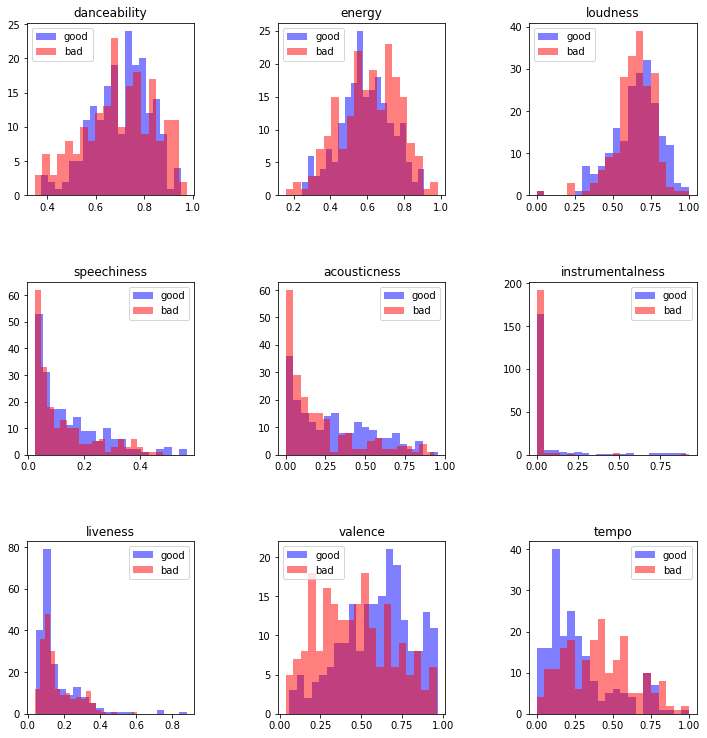

In [751]:
import seaborn as sns
features = [i for i in good_music.columns][0:9]
print(features)

fig, axs = plt.subplots(figsize=(12, 12), nrows=3, ncols=3)
fig.subplots_adjust(wspace=0.5, hspace=0.5, top=1, bottom=0.2)

for col, ax in zip(features, axs.flatten()):
    ax.hist(good_music[col], bins=20, color='b', alpha=0.5, label='good')
    ax.hist(bad_music[col], bins=20, color='r', alpha=0.5, label='bad')
    ax.set_title(col)
    ax.legend()

plt.savefig(fname='histplots.png', dpi=500, transparent=False)
plt.show()


### Audio Feature Means for Each 3 Datasets

Checking to make sure that mean values between good/bad are diferent enough and that good/streaming history are relatively similar

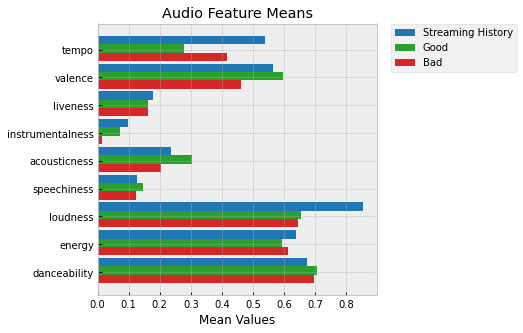

In [1238]:
goodmean=[]
badmean=[]
fullmean=[]
labels=[]
for i in good_music.columns[0:9]:
    goodmean.append(good_music_scaled[i].mean())
    badmean.append(bad_music_scaled[i].mean())
    fullmean.append(afdf_scaled[i].mean())
    labels.append(i)
index=np.arange(len(labels))

fig, ax = plt.subplots(figsize=(5,5))
ax.barh(index+.3, fullmean, height=0.3, color='tab:blue', label = 'Streaming History')
ax.barh(index, goodmean, height=0.3, color='tab:green', label='Good')
ax.barh(index-.3, badmean, height=0.3, color='tab:red', label = 'Bad')

ax.set_yticks(index -.1 / 2)
ax.set_yticklabels(labels)
plt.xlabel('Mean Values')
plt.title('Audio Feature Means')
ax.legend()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(fname='distmeans.png', dpi=500, bbox_inches='tight')
plt.show()

## Combine Good/Bad Into 1 DF for Analysis

In [752]:
combined = pd.concat([good_music, bad_music])

In [754]:
combined = combined.drop(['id', 'duration_ms'], axis=1)
combined['loudness'] = (combined['loudness'] - combined['loudness'].min())/(combined['loudness'].max()- combined['loudness'].min())
combined['tempo'] = (combined['tempo'] - combined['tempo'].min())/(combined['tempo'].max()- combined['tempo'].min())

combined

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,target
0,0.863,0.533,0.626441,0.0484,0.2910,0.001260,0.0794,0.738,0.193715,1
1,0.859,0.567,0.337019,0.1080,0.3880,0.830000,0.0984,0.337,0.305421,1
2,0.934,0.524,0.608238,0.0654,0.2710,0.245000,0.0672,0.785,0.312906,1
3,0.739,0.522,0.335333,0.1510,0.8210,0.001240,0.2330,0.619,0.463905,1
4,0.743,0.683,0.854311,0.2010,0.0713,0.000000,0.1500,0.926,0.290702,1
...,...,...,...,...,...,...,...,...,...,...
195,0.505,0.710,0.826659,0.0321,0.1900,0.000250,0.3290,0.428,0.169597,0
196,0.590,0.797,0.724175,0.0614,0.1320,0.000000,0.0846,0.425,0.206717,0
197,0.641,0.324,0.672553,0.0299,0.6980,0.000000,0.3280,0.273,0.319604,0
198,0.599,0.448,0.647503,0.0232,0.1630,0.000000,0.1060,0.168,0.207473,0


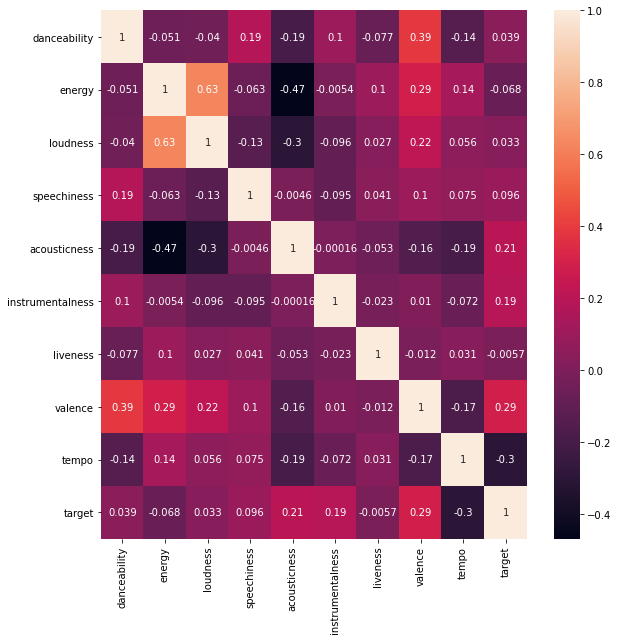

In [756]:
fig, ax = plt.subplots(figsize=(9,9))
ax = sns.heatmap(combined.corr(), annot=True)
plt.tight_layout()
plt.savefig('corrplot1.png', dpi=400)

## 4/6/21 - Use Streaming History as Dataset
Rather than use the curated 200 songs each for a 'good' and 'bad' playlist, I decided to use my streaming history and a separate set of streaming history from a friend to gather more data points with greater diversity in the data. Same processing was used below. 

In [22]:
### Joe Data
dfjoe= pd.read_json('StreamingHistory0_Joe.json')
# dfjoe.head(50)
len(pd.unique(dfjoe['trackName']))
dfjoe
#slice DataFrame to only include unique values
dfjunq = dfjoe.drop_duplicates(subset=['trackName'])
dfjunq

,endTime,artistName,trackName,msPlayed
0,2020-04-05 20:10,Good Times Ahead,Break Your Neck - Pt. 2 VIP,56717
1,2020-04-05 20:15,Jayceeoh,Levitate,180073
2,2020-04-05 20:18,Bok Nero,No Problems (feat. Jahlil Beats) - QUIX Remix,195937
3,2020-04-05 20:22,Subtronics,Blastin,244965
4,2020-04-05 20:25,Eliminate,Them Ft. Virus Syndicate,172855
...,...,...,...,...
2049,2021-03-25 22:09,Kanye West,All Of The Lights,299613
2050,2021-03-25 22:13,Flo Rida,I Cry,223800
2053,2021-03-25 22:38,Pitbull,Hey Baby (Drop It to the Floor) (feat. T-Pain),125542
2074,2021-03-29 21:05,Disturbing Tha Peace,Move Bitch,270866


In [23]:
#percentage unique songs for my streaming history
len(df['trackName'].unique())/(len(df['trackName']))

0.2713368580060423

In [24]:
#percentage unique songs for my streaming history - plays greater than 30s
len(df[df['msPlayed'] > 30000]['trackName'].unique())/(len(df['trackName']))

0.20801863041289023

In [25]:
#percentage unique songs for Joe's streaming history
len(dfjoe['trackName'].unique())/(len(dfjoe['trackName']))

0.30440967283072545

In [26]:
#percentage unique songs for Joe's streaming history - plays greater than 30s
len(dfjoe[dfjoe['msPlayed'] > 30000]['trackName'].unique())/(len(dfjoe['trackName']))

0.29113323850165956

In [27]:
#gather track ID's
import spotipy
import time
import json
from spotipy.oauth2 import SpotifyClientCredentials
from creds import CLIENT_ID, CLIENT_SECRET

client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)
songs=[i for i in dfjunq['trackName']]
artists=[i for i in dfjunq['artistName']]
query = [i for i in zip(songs, artists)]
track_ids=[]

for i in (range(len(query))):
    try:
        time.sleep(1)
        searchQuery = songs[i] + ' ' + artists[i]
        searchResults=sp.search(q=searchQuery)
        print(searchResults['tracks']['items'][0]['id'])
        track_ids.append(searchResults['tracks']['items'][0]['id'])
    except:
        print('not found')
        track_ids.append('NaN')

ModuleNotFoundError: No module named 'spotipy'

In [28]:
dfjunq['trackId'] = track_ids

NameError: name 'track_ids' is not defined

In [29]:
dfjunq['trackId'] = dfjunq['trackId'].replace('NaN', np.nan)
dfjunq.dropna(inplace=True)

KeyError: 'trackId'

In [29]:
# Audio feature values for this df
af_joe = []
tmp=[]
for num, i in enumerate(dfjunq['trackId']):
    print('Progress: ' + str(num/len(dfjunq['trackId'])*100) + '% complete')
    tmp.append(i)
    if len(tmp) % 100 == 0 and len(dfjunq['trackId']) - len(af_joe) > 100:
        af_joe.extend(sp.audio_features(tmp))
        tmp=[]
        time.sleep(3)
    elif len(tmp) % 100 != 0 and len(dfjunq['trackId']) - len(af_joe) < 100:
        af_joe.extend(sp.audio_features(tmp))
        tmp=[]
        time.sleep(1)

Progress: 0.0% complete
Progress: 0.1597444089456869% complete
Progress: 0.3194888178913738% complete
Progress: 0.4792332268370607% complete
Progress: 0.6389776357827476% complete
Progress: 0.7987220447284344% complete
Progress: 0.9584664536741214% complete
Progress: 1.1182108626198082% complete
Progress: 1.2779552715654952% complete
Progress: 1.4376996805111821% complete
Progress: 1.5974440894568689% complete
Progress: 1.7571884984025559% complete
Progress: 1.9169329073482428% complete
Progress: 2.07667731629393% complete
Progress: 2.2364217252396164% complete
Progress: 2.3961661341853033% complete
Progress: 2.5559105431309903% complete
Progress: 2.7156549520766773% complete
Progress: 2.8753993610223643% complete
Progress: 3.035143769968051% complete
Progress: 3.1948881789137378% complete
Progress: 3.3546325878594248% complete
Progress: 3.5143769968051117% complete
Progress: 3.6741214057507987% complete
Progress: 3.8338658146964857% complete
Progress: 3.993610223642172% complete
Progr

Progress: 47.92332268370607% complete
Progress: 48.08306709265175% complete
Progress: 48.242811501597444% complete
Progress: 48.402555910543136% complete
Progress: 48.56230031948881% complete
Progress: 48.722044728434504% complete
Progress: 48.881789137380196% complete
Progress: 49.04153354632588% complete
Progress: 49.201277955271564% complete
Progress: 49.36102236421725% complete
Progress: 49.52076677316294% complete
Progress: 49.680511182108624% complete
Progress: 49.84025559105431% complete
Progress: 50.0% complete
Progress: 50.159744408945684% complete
Progress: 50.319488817891376% complete
Progress: 50.47923322683706% complete
Progress: 50.638977635782744% complete
Progress: 50.798722044728436% complete
Progress: 50.95846645367412% complete
Progress: 51.118210862619804% complete
Progress: 51.2779552715655% complete
Progress: 51.43769968051119% complete
Progress: 51.597444089456864% complete
Progress: 51.75718849840255% complete
Progress: 51.91693290734825% complete
Progress: 52.0

Progress: 95.84664536741214% complete
Progress: 96.00638977635782% complete
Progress: 96.1661341853035% complete
Progress: 96.3258785942492% complete
Progress: 96.48562300319489% complete
Progress: 96.64536741214057% complete
Progress: 96.80511182108627% complete
Progress: 96.96485623003196% complete
Progress: 97.12460063897763% complete
Progress: 97.28434504792332% complete
Progress: 97.44408945686901% complete
Progress: 97.60383386581469% complete
Progress: 97.76357827476039% complete
Progress: 97.92332268370608% complete
Progress: 98.08306709265176% complete
Progress: 98.24281150159744% complete
Progress: 98.40255591054313% complete
Progress: 98.56230031948881% complete
Progress: 98.7220447284345% complete
Progress: 98.8817891373802% complete
Progress: 99.04153354632588% complete
Progress: 99.20127795527156% complete
Progress: 99.36102236421725% complete
Progress: 99.52076677316293% complete
Progress: 99.68051118210862% complete
Progress: 99.84025559105432% complete


In [32]:
joeafdf = pd.DataFrame(af_joe)
joeafdf.drop(['type', 'key', 'mode', 'uri', 'track_href', 'analysis_url', 'time_signature'], axis=1, inplace=True)
joeafdf_scaled = joeafdf
joeafdf_scaled['loudness'] = (joeafdf_scaled['loudness'] - joeafdf_scaled['loudness'].min())/(joeafdf_scaled['loudness'].max()- joeafdf_scaled['loudness'].min())
joeafdf_scaled['tempo'] = (joeafdf_scaled['tempo'] - joeafdf_scaled['tempo'].min())/(joeafdf_scaled['tempo'].max()- joeafdf_scaled['tempo'].min())
joeafdf_scaled

NameError: name 'af_joe' is not defined

In [240]:
import pickle
joeafdf.to_pickle("./joeafdf.pkl")
joeafdf_scaled.to_pickle("./joeafdfscaled.pkl")

In [34]:
joeafdf_scaled = pd.read_pickle("./joeafdfscaled.pkl")

#### Decreasing samples from my streaming history to same size as Joe DF

In [37]:
import random
streamsample = random.sample(range(1, 15800), 627)

In [594]:
sampled = afdf_scaled.iloc[streamsample, :]

['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


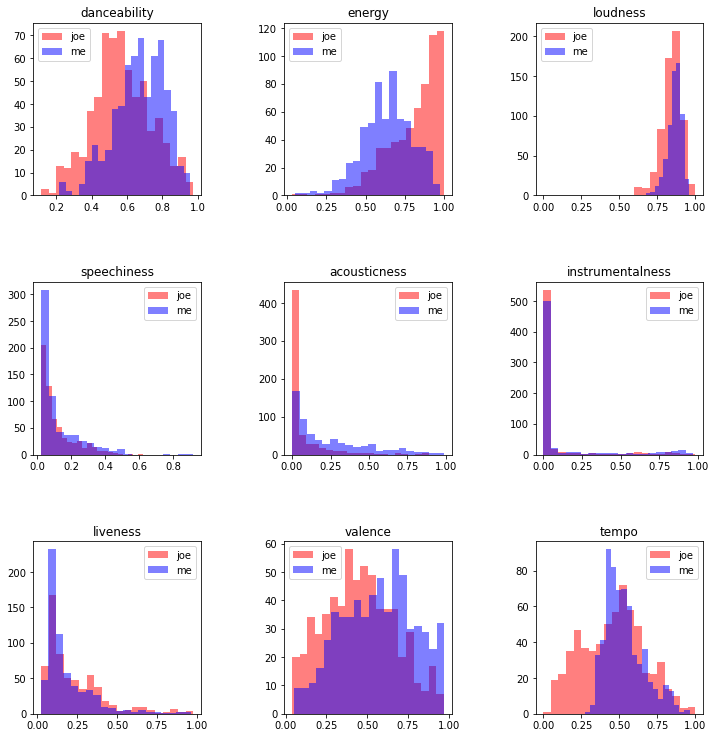

In [647]:
import seaborn as sns
features = [i for i in sampled.columns][0:9]
print(features)

fig, axs = plt.subplots(figsize=(12, 12), nrows=3, ncols=3)
fig.subplots_adjust(wspace=0.5, hspace=0.5, top=1, bottom=0.2)

for col, ax in zip(features, axs.flatten()):
    ax.hist(joeafdf_scaled[col], bins=20, color='r', alpha=0.5, label='joe')
    ax.hist(sampled[col], bins=20, color='b', alpha=0.5, label='me')
    ax.set_title(col)
    ax.legend()

plt.show()

In [708]:
#concatenate dataframes into one and generate target column
joeafdf_scaled['target'] = 0
sampled['target'] = 1
combinednew = pd.concat([joeafdf_scaled, sampled], ignore_index=True)
combinednew.drop(['id', 'duration_ms'], axis=1, inplace=True)
combinednew

<ipython-input-708-8dd84c127166>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled['target'] = 1


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,target
0,0.405,0.980,0.929140,0.1670,0.000125,0.221000,0.0652,0.206,0.540529,0
1,0.713,0.695,0.839350,0.2510,0.168000,0.000703,0.2570,0.390,0.539922,0
2,0.727,0.734,0.929754,0.3330,0.017500,0.000149,0.3850,0.714,0.077373,0
3,0.734,0.907,0.930398,0.3030,0.096700,0.000003,0.6050,0.487,0.576969,0
4,0.684,0.970,0.966238,0.2540,0.190000,0.000014,0.1160,0.692,0.620316,0
...,...,...,...,...,...,...,...,...,...,...
1248,0.765,0.858,0.864516,0.0486,0.014100,0.790000,0.0934,0.199,0.523804,1
1249,0.919,0.550,0.740596,0.0543,0.155000,0.000064,0.1640,0.945,0.495814,1
1250,0.721,0.649,0.880236,0.0461,0.465000,0.000298,0.0968,0.906,0.794974,1
1251,0.875,0.771,0.936864,0.0698,0.067000,0.020000,0.3400,0.838,0.505183,1


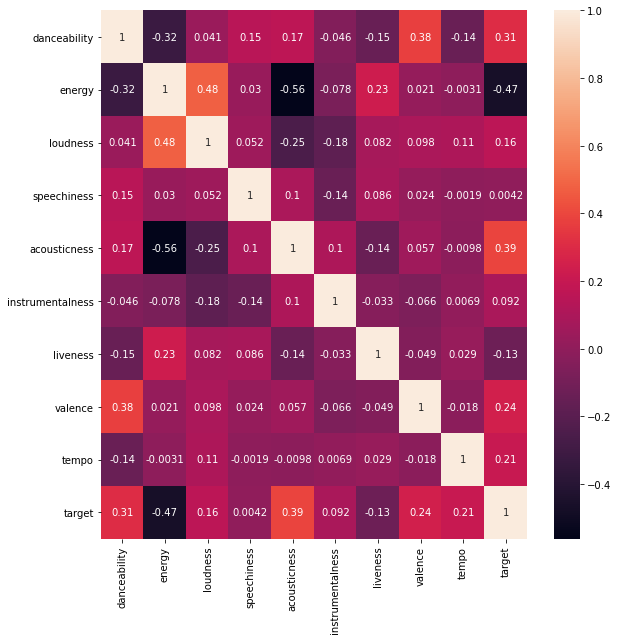

In [757]:
#pearson correlation coefficient
fig, ax = plt.subplots(figsize=(9,9))
ax = sns.heatmap(combinednew.corr(), annot=True)
plt.tight_layout()
plt.savefig('corrplot2.png', dpi=400)

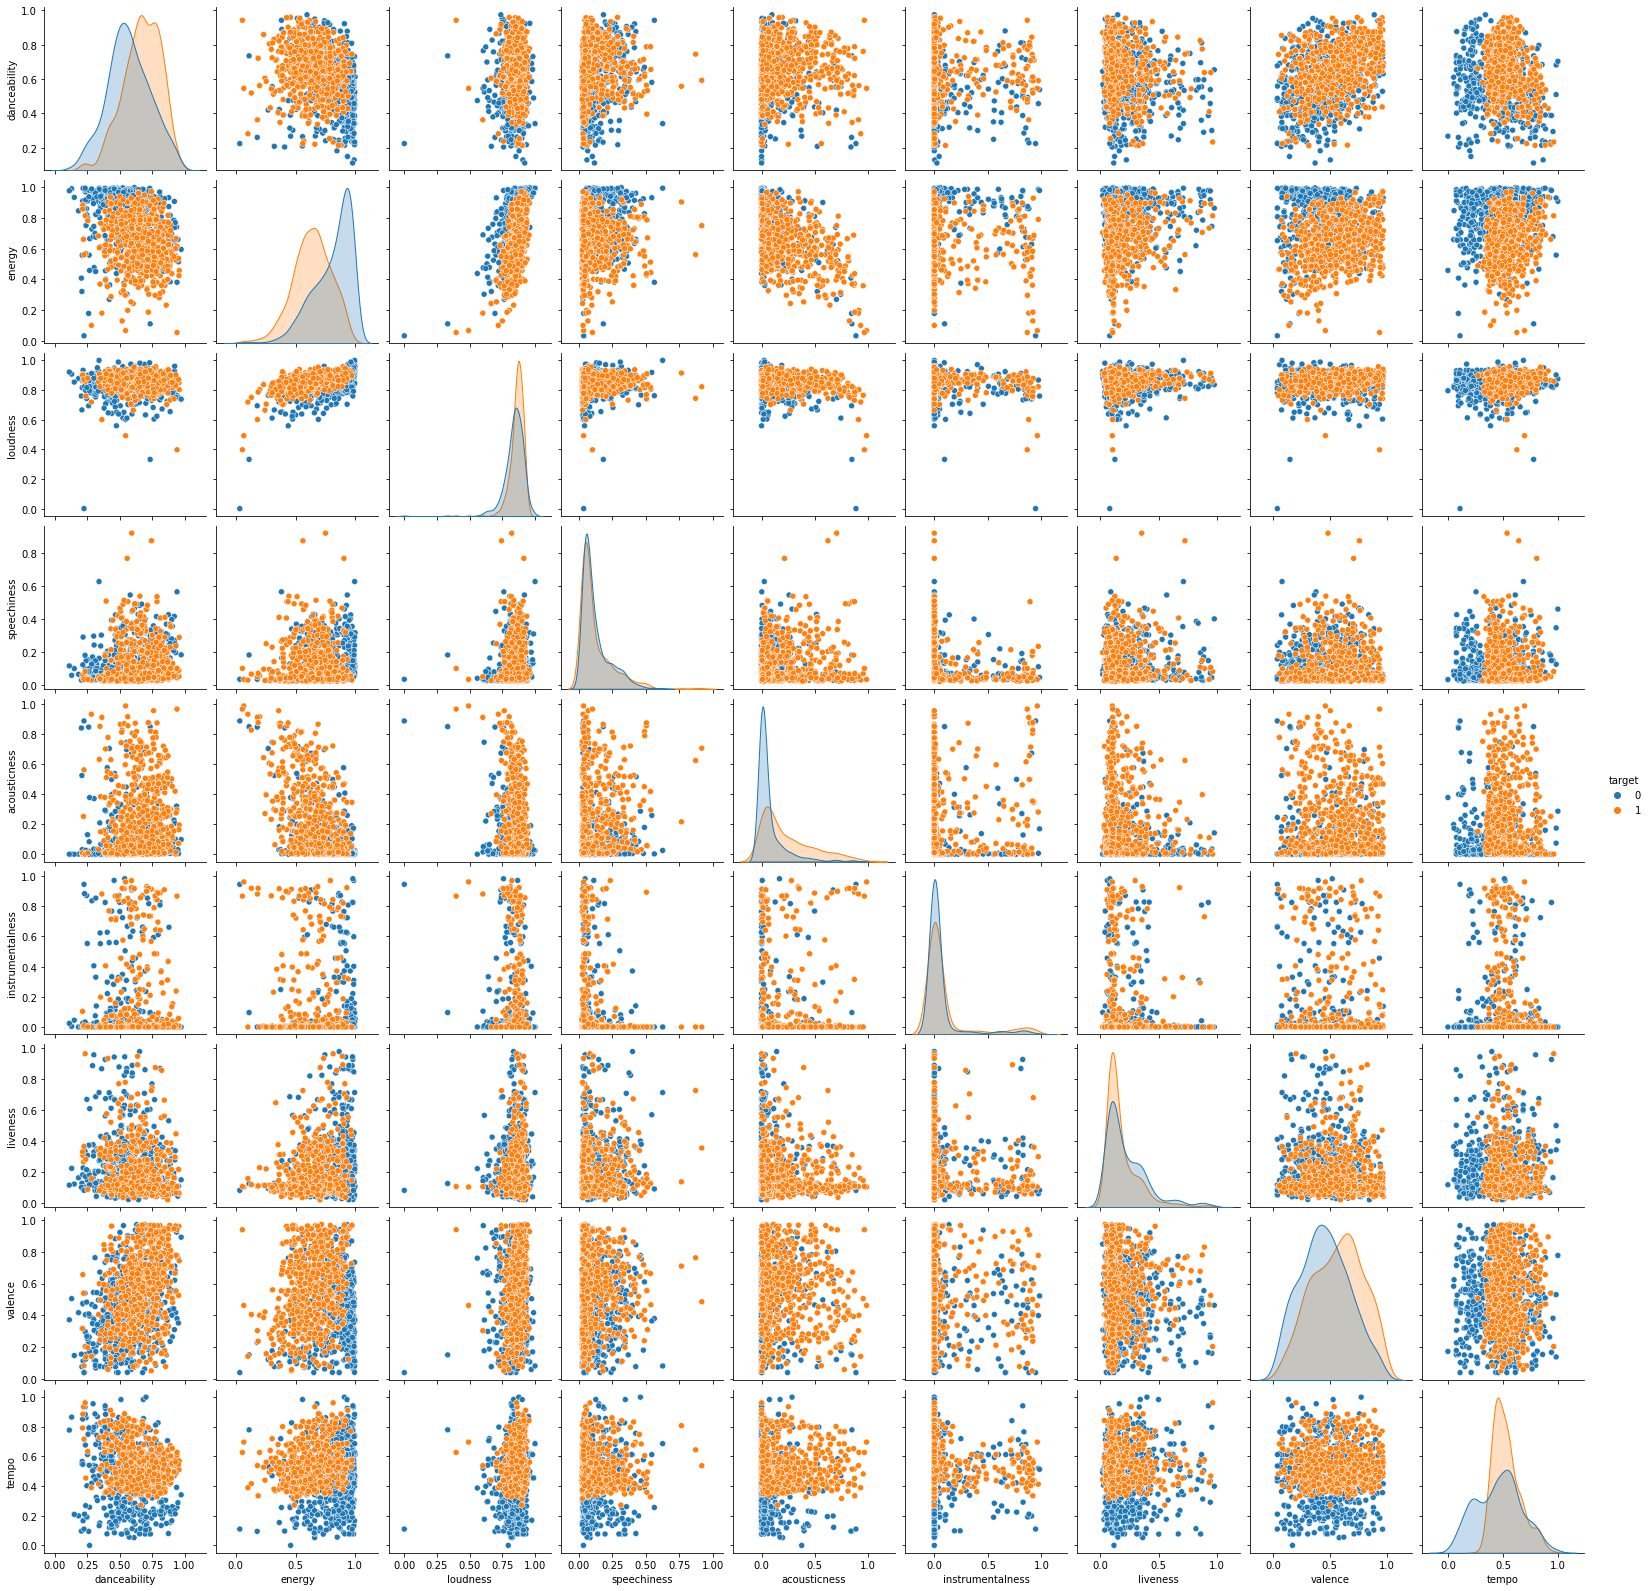

In [702]:
sns.pairplot(combinednew, hue='target')
plt.show()

In [640]:
pd.to_pickle(combinednew, './training.pkl')

# Machine Learning Predictions

In [761]:
X2 = combined.drop(['target'], axis=1).values
y2 = combined['target'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state=1)

#### New Dataset

In [711]:
X = combinednew.drop(['target'], axis=1).values
y = combinednew['target'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

### Trying kNN first

In [531]:
#import relevant libraries
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn import neighbors
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [635]:
knn = KNeighborsClassifier()
knn_score = cross_val_score(knn, X_train ,y_train, cv=10, scoring='accuracy').mean()
print(knn_score)

0.8272772277227723


In [523]:
grid_params = {
    'n_neighbors': np.arange(3, 29, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv=10,
    n_jobs=-1)
gs_results = gs.fit(X, y)
print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

Fitting 10 folds for each of 52 candidates, totalling 520 fits
0.841136507936508
KNeighborsClassifier(metric='manhattan', n_neighbors=13, weights='distance')
{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}


Text(0, 0.5, 'Accuracy Score')

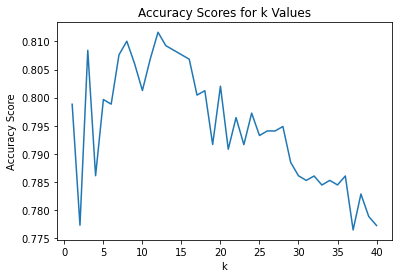

In [502]:
k_range = range(1,41)
k_scores=[]
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(list(k_range), k_scores)
plt.title('Accuracy Scores for k Values')
plt.xlabel('k')
plt.ylabel('Accuracy Score')

In [636]:
clf = KNeighborsClassifier(metric='manhattan', n_neighbors=13, weights='distance')
clf = clf.fit(X_train, y_train)
knn_acc = clf.score(X_test,y_test)
print(knn_acc)

0.8446215139442231


In [526]:
model = KNeighborsClassifier(n_neighbors=13, metric='manhattan')
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.8331619047619048


In [105]:
kf = KFold(n_splits=10, shuffle=False)
kf.split(X)

accuracy_model=[]

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    fitted = model.fit(X_train, y_train)
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True))

print(accuracy_model)

[0.7301587301587301, 0.7222222222222222, 0.5476190476190477, 0.752, 0.624, 0.816, 0.736, 0.816, 0.856, 0.84]


### Logistic Regression

In [528]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [712]:
logreg = LogisticRegression()
logreg_score=cross_val_score(logreg,X_train,y_train,cv=10, scoring='accuracy').mean()
print(logreg_score)

0.8043465346534653


### SVM

In [713]:
from sklearn import svm
svm = svm.SVC()
svm_score=cross_val_score(svm,X_train,y_train,cv=10, scoring='accuracy').mean()
print(svm_score)

0.8652178217821783


In [833]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.svm import SVC

model = svm.SVC(kernel = 'poly', C=100, degree=2)
model.fit(X,y)
model.score(dw_X, dw_y)

0.3617021276595745

### Decision Trees/Random Forest

In [715]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier()
dtc_score = cross_val_score(dtc, X_train,y_train,cv=10, scoring='accuracy').mean()
print(dtc_score)

bag = BaggingClassifier(base_estimator=DecisionTreeClassifier())
bag_score = cross_val_score(bag, X_train,y_train,cv=10, scoring='accuracy').mean()
print(bag_score)

rf = RandomForestClassifier()
rf_score = cross_val_score(rf, X_train,y_train,cv=10, scoring='accuracy').mean()
print(rf_score)

0.8312376237623763
0.8622376237623763
0.8742079207920792


In [717]:
param_grid = {'n_estimators': [900], 
              'min_samples_leaf': [2], 
              'max_features': ['auto']}
rfc_model = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, verbose=True)
rfc_model.fit(X_train, y_train)
print(rfc_model.best_params_)
print(rfc_model.best_estimator_)
print(rfc_model.best_score_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
{'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 900}
RandomForestClassifier(min_samples_leaf=2, n_estimators=900)
0.8781881188118812


In [725]:
best_rf = RandomForestClassifier(n_estimators=900, max_features='auto', min_samples_leaf=2)
clf.fit(X_train, y_train)
rf_acc = clf.score(X_test, y_test)
print(rf_acc)

0.8924302788844621


### XGBoost

In [726]:
xgb = XGBClassifier(use_label_encoder=False)
xgb_score = cross_val_score(xgb, X_train,y_train,cv=10, scoring='accuracy').mean()
print(xgb_score)

[12:47:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:47:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:47:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:47:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [759]:
param_grid =  {
    'max_depth': [6],
    'min_child_weight': [1],
    'gamma':[.001],
    'subsample': [ 0.65],
    'colsample_bytree': [0.8],
    'reg_lambda': [1]
}
grid= GridSearchCV(estimator=XGBClassifier(use_label_encoder=False), 
                   param_grid=param_grid, cv=KFold(n_splits=10, random_state=None), verbose=50, n_jobs=-1)
grid.fit(X_train, y_train)
print('\nBest R^2 Score : %.2f'%grid.best_score_, ' Best Params : ', str(grid.best_params_))
bestboost = grid.best_estimator_
# bestboost.fit(X_train, y_train)

print(bestboost.score(X_test, y_test))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[16:25:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Best R^2 Score : 0.90  Best Params :  {'colsample_bytree': 0.8, 'gamma': 0.001, 'max_depth': 6, 'min_child_weight': 1, 'reg_lambda': 1, 'subsample': 0.65}
0.9083665338645418


### Results from Predicting Discover Weekly Songs

0.3829787234042553
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0]
[[16  1]
 [28  2]]


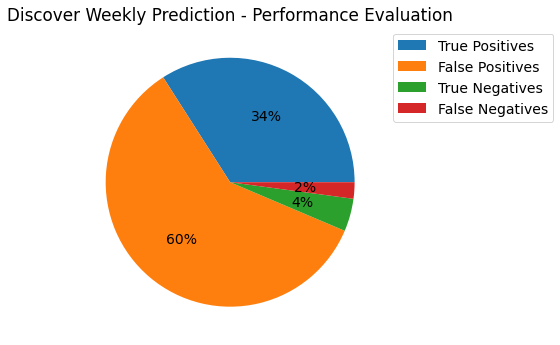

In [816]:
print(bestboost.score(dw_X,dw_y))
print(bestboost.predict(dw_X))
confusion = confusion_matrix(dw_y, bestboost.predict(dw_X))
print(confusion)
total=len(dw_X)
tp = confusion[0,0]
fp = confusion[1,0]
tn = confusion[1,1]
fn = confusion[0,1]
piex=[tp/total, fp/total, tn/total, fn/total]
labels=['True Positives', 'False Positives', 'True Negatives', 'False Negatives']
plt.rcParams['font.size'] = 14
plt.figure(figsize=(7,7))
plt.pie(piex, autopct='%1.f%%')
plt.title('Discover Weekly Prediction - Performance Evaluation')
plt.legend(labels, bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('predictresults.png', dpi=400,bbox_inches='tight')
plt.show()

[0]	validation_0-error:0.08483	validation_0-logloss:0.51640	validation_1-error:0.18327	validation_1-logloss:0.56291
[1]	validation_0-error:0.06487	validation_0-logloss:0.40767	validation_1-error:0.19522	validation_1-logloss:0.49172
[2]	validation_0-error:0.05589	validation_0-logloss:0.33215	validation_1-error:0.19920	validation_1-logloss:0.44686
[3]	validation_0-error:0.05090	validation_0-logloss:0.28110	validation_1-error:0.15936	validation_1-logloss:0.40106
[4]	validation_0-error:0.04291	validation_0-logloss:0.23715	validation_1-error:0.15538	validation_1-logloss:0.37889
[5]	validation_0-error:0.03992	validation_0-logloss:0.20439	validation_1-error:0.16733	validation_1-logloss:0.36199
[6]	validation_0-error:0.03493	validation_0-logloss:0.17785	validation_1-error:0.16733	validation_1-logloss:0.34540
[7]	validation_0-error:0.02695	validation_0-logloss:0.15862	validation_1-error:0.15538	validation_1-logloss:0.33475
[8]	validation_0-error:0.02695	validation_0-logloss:0.14347	validation_1

[71]	validation_0-error:0.00000	validation_0-logloss:0.01359	validation_1-error:0.11952	validation_1-logloss:0.33112
[72]	validation_0-error:0.00000	validation_0-logloss:0.01338	validation_1-error:0.11952	validation_1-logloss:0.33248
[73]	validation_0-error:0.00000	validation_0-logloss:0.01318	validation_1-error:0.12351	validation_1-logloss:0.33389
[74]	validation_0-error:0.00000	validation_0-logloss:0.01296	validation_1-error:0.12749	validation_1-logloss:0.33469
[75]	validation_0-error:0.00000	validation_0-logloss:0.01283	validation_1-error:0.12749	validation_1-logloss:0.33448
[76]	validation_0-error:0.00000	validation_0-logloss:0.01269	validation_1-error:0.12749	validation_1-logloss:0.33408
[77]	validation_0-error:0.00000	validation_0-logloss:0.01254	validation_1-error:0.12749	validation_1-logloss:0.33499
[78]	validation_0-error:0.00000	validation_0-logloss:0.01236	validation_1-error:0.12351	validation_1-logloss:0.33652
[79]	validation_0-error:0.00000	validation_0-logloss:0.01219	val

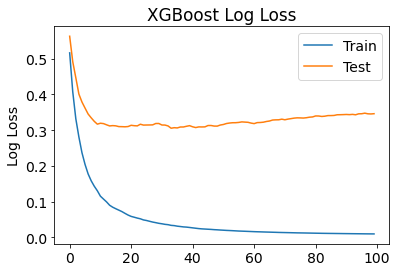

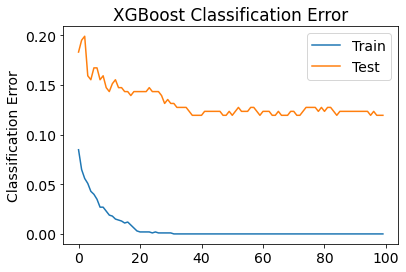

In [827]:
# Try Early stopping
# this code taken from: https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/

# plot learning curve
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# fit model no training data
model = XGBClassifier(use_label_encoder=False)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.savefig('xgboostlogloss.png', dpi=400)
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.savefig('xgboostclasserror.png', dpi=400)
pyplot.show()

In [825]:
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=15, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.53404
[1]	validation_0-logloss:0.44501
[2]	validation_0-logloss:0.38295
[3]	validation_0-logloss:0.33583
[4]	validation_0-logloss:0.30369
[5]	validation_0-logloss:0.27787
[6]	validation_0-logloss:0.26236
[7]	validation_0-logloss:0.25243
[8]	validation_0-logloss:0.24480
[9]	validation_0-logloss:0.23387
[10]	validation_0-logloss:0.22774
[11]	validation_0-logloss:0.22330
[12]	validation_0-logloss:0.21898
[13]	validation_0-logloss:0.21791
[14]	validation_0-logloss:0.21397
[15]	validation_0-logloss:0.21714
[16]	validation_0-logloss:0.21376
[17]	validation_0-logloss:0.21503
[18]	validation_0-logloss:0.21426
[19]	validation_0-logloss:0.21493
[20]	validation_0-logloss:0.21349
[21]	validation_0-logloss:0.21254
[22]	validation_0-logloss:0.21369
[23]	validation_0-logloss:0.21322
[24]	validation_0-logloss:0.21419
[25]	validation_0-logloss:0.21286
[26]	validation_0-logloss:0.21298
[27]	validation_0-logloss:0.21192
[28]	validation_0-logloss:0.21474
[29]	validation_0-loglos

C:\Users\jspit\Anaconda3\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [826]:
print(dw_X)

model.score(dw_X,dw_y)

[[6.31000000e-01 8.60000000e-01 6.95638332e-01 1.21000000e-01
  1.71000000e-02 5.83000000e-06 3.33000000e-01 3.82000000e-01
  1.00000000e+00]
 [5.90000000e-01 9.69000000e-01 8.65223390e-01 8.17000000e-02
  2.14000000e-03 1.32000000e-01 9.52000000e-01 2.23000000e-01
  3.00369635e-01]
 [4.98000000e-01 9.75000000e-01 7.61647034e-01 7.40000000e-02
  2.23000000e-04 2.28000000e-06 9.99000000e-02 3.36000000e-01
  2.54775214e-01]
 [5.93000000e-01 9.93000000e-01 1.00000000e+00 3.36000000e-01
  3.02000000e-03 3.46000000e-01 3.90000000e-01 4.57000000e-01
  7.08825725e-01]
 [2.73000000e-01 9.73000000e-01 7.99533057e-01 1.23000000e-01
  1.22000000e-05 7.13000000e-06 2.83000000e-01 2.08000000e-01
  1.71552650e-01]
 [4.91000000e-01 8.70000000e-01 7.66422583e-01 4.43000000e-02
  4.49000000e-05 1.45000000e-04 6.07000000e-02 2.10000000e-01
  2.82616217e-01]
 [4.39000000e-01 8.94000000e-01 5.46853444e-01 5.17000000e-02
  3.30000000e-06 2.11000000e-02 9.05000000e-02 5.91000000e-01
  2.19195543e-01]
 [4.42

0.425531914893617

#### XGBoost Feature Importance

[23:00:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9083665338645418


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

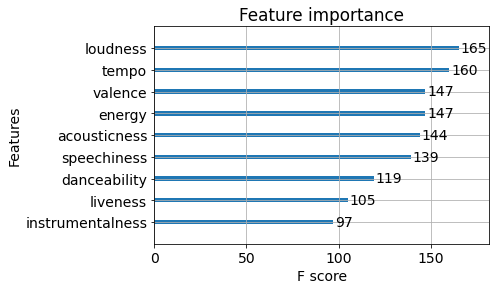

In [832]:
from xgboost import plot_importance

X = combinednew.drop(['target'], axis=1)
y = combinednew['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

model= XGBClassifier(use_label_encoder=False, max_depth=6, min_child_weight=1, gamma=.001, subsample=.65, 
                     colsample_bytree=.8, reg_lambda=1)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))
plot_importance(model)

### First set of results

In [234]:
acc_df = pd.DataFrame({'Model': ['k Nearest Neighbor', 'SVM', 'Logistic Regression', 'Random Forest'], 
                       'Accuracy': [knn_acc, svm_acc, logreg_acc, rf_acc]})
acc_df

,Model,Accuracy
0,k Nearest Neighbor,0.844622
1,SVM,0.820717
2,Logistic Regression,0.776000
3,Random Forest,0.896414


### Second dataset cross-validated results

In [658]:
acc_df2 = pd.DataFrame({'Model': ['k Nearest Neighbor', 'SVM', 'Logistic Regression', 'Random Forest', 'XGBoost'], 
                       'Accuracy': [knn_score, svm_score, logreg_score, rf_score, xgb_score]})
acc_df2

,Model,Accuracy
0,k Nearest Neighbor,0.827277
1,SVM,0.850717
2,Logistic Regression,0.805289
3,Random Forest,0.873879
4,XGBoost,0.880286


### Predict Which Discover Weekly Playlist

#### Joe's Discover Weekly

In [768]:
joedw = {'Title': ['Bad Mother F*cker', 'Here Comes the Boom', 'Bring It', 'Game Day', 'Repeat Process', 'Dumptruck',
                  'Get Up Again', 'Welcome Home', 'Knock Me Down', 'Warrior Part 2', 'Frat House', 'Paranoia',
                  'I Smoke, I Drink (Remix)-Remix Main', 'Hammer', 'Country Sh*t (Remix)', 'Beast Mode', "Pray for 'em"],
        'Artist':['Machine Gun Kelly, Kid Rock', 'Rise of the Northstar', 'Trapt', 'BLVD.', '100 Demons', 'Wilson',
                 'Flaw', 'Coheed and Cambria', 'Tommy Lee, Killvein', 'Lloyd Banks', 'Slaughterhouse','A Day To Remember',
                 'Mr. Magic, Roy Jones Jr., Youngbloodz', 'Dirtyphonics, Sullivan King', 'Bit K.R.I.T., Ludacris, Bun B',
                 'B.o.B', 'Baskem'],
        'URI': ['2kjPvFgVIGki2BRlOHvQQr','4OAFv8nnEKz61PCNJP21tH', '5BInskLvwqz56ClUpfqdI4', '2FWYr2BZTRqFwZIhVmhCnn',
               '3RVBM5lyynkNRwg1N1cFGr', '7DnrADDBDIIXw2ZlU5q49W', '7jClgHzR5JG69gar7rVMoX', '42GP0xKtkolBnmqQRvSllO',
               '1qwZ43K1PM1B9rHjpt3hXK', '1kSSWsWZuCcrlgVpb5yKYn', '7DcZTn5JK3SJPFqb74b4h0', '3HhaSocKwTptze7PySNZlW',
               '77iD0HIAZYVD04CKDoJdud', '3HPPcZ9oK7yGmy5vn7OMLC', '36N2bDLedBsK9VylCszIwH', '7cYQSfAL1zkPkpEaE7FsQu',
                '4Of9KweFyDMknet4POr6GN']}
joedwdf = pd.DataFrame(joedw)

#### Justin's Discover Weekly

In [772]:
jusdw = {'Title': ['Running Red Lights', 'Heavenly Maybe', 'Kids', 'Dive', 'colours', 'Listerine', 'Astronaut',
                  'It All Began With A Burst', 'Night Running', "Feelin' Good", 'Fallen Bees', 'Shrugging Match',
                  'You Seemed so Happy', 'Amazing, Pt. 1', 'How Can I Love You?', 'The Hustle', 
                   "Forbidden Dreams - JJ's Sail Off into The Sun Remix", 'afterwards', 'Sorry', 'How Was I Supposed To Know',
                  'Timeshare (Wizard Remix)', 'The Look', 'Trouble to Share', 'Shiki No Uta', '77-76', 'Settle Down',
                  'Green Eyed', 'Raspberry', 'All Aboard (feat. Reva Devito)', 'Music'],
        'Artist':['The Avalanches, Rivers Cuomo', 'Gengahr', 'Busty and the Bass', 'Coast Modern', 'Happyalone.',
                 'Dayglow', 'Sir Sly', 'Kishi Bashi', 'Cage the Elephant, Beck', 'J Lloyd', 'Sleepy Dog',
                 'Bobbing', 'The Japanese House', 'Bohdi, Cactus?', 'Yellow Days', 'Kiltro', 'Benny Bridges, Josh Taylor',
                 'yutaka hirasaka', 'Hala', 'Luna Lake', 'Spaceface','Sports', 'Just Jack', 'Bad Snacks', 'Royal Canoe',
                 'North Downs', 'Silky Roads', 'Grouplove', 'Dark Time Sunshine', 'Peter Bjorn and John'],
        'URI': ['3BjcCLvgi6anh2xcRnBerE', '0KGc8uyIXJdZjyMe8Jihdk', '4RVT0yFwQyRLiQs1Tt967l', '0YhRiaZFi8amEL2jRtVylQ',
               '6rc7YeBedJrReYKSF9cFs6', '5LEVjmo2QweDHc7k19aFcp', '3q5Zm5NnYcpXKLNmTO1tyo', '0Nl88CJJPQqKpxDOqzAgoH',
               '0wSmZykDgah7GfaUNZUZCb', '2hn5Zsbzl9rHfcn2x7D0tI', '1K2TblsoRalSISa6iG4maC', '7pGVprlr5CWkQa6GIaX3yN',
               '0NuIfPuBhUAt4aA4HP0rUu', '2uc2p0dm10s9PRTKP84nm8', '4XNPZFA6HMhkIkbJBDo70X', '7qtuP1pjkDOw0BNyBaCu6t',
               '7aIEKcurfXp2W9sxX5uAGT', '7JLVTrT4Eji7ZD1YPufZ2W', '7Hs4BDVWvKvKzfr5A0pI9K', '7Cr2kw7HQYKV1H0LBEf18W',
               '6fxrvqES5ClwyeGl2cOiCL', '6cGdaUtU9aPow49qHXOqMt', '65lZrz3d2nPrryy7VawRai', '5zOKeWtBRUZxlpfG8P0LnX',
               '3RuM2hNO6pZhhJ2qa0ZMZ6', '3CUotoSWVxQN5nrQCwpzTA', '2PxZniI0DTDLOLH5AGsBAq', '1F5A4LpF8ylUVtPoMAvNvn',
               '0CWd6fk4hpq5nyF0DG0wIi', '05kQ0u75nvDyklAbLbK3im']}
jusdwdf = pd.DataFrame(jusdw)

In [570]:
# Audio Features for these dfs
joedw_af = []
tmp=[]
for num, i in enumerate(joedwdf['URI']):
    print('Progress: ' + str(num/len(joedwdf['URI'])*100) + '% complete')
    tmp.append(i)
    if len(tmp) % 100 == 0 and len(joedwdf['URI']) - len(joedw_af) > 100:
        joedw_af.extend(sp.audio_features(tmp))
        tmp=[]
        time.sleep(3)
    elif len(tmp) % 100 != 0 and len(joedwdf['URI']) - len(joedw_af) < 100:
        joedw_af.extend(sp.audio_features(tmp))
        tmp=[]
        time.sleep(1)

Progress: 0.0% complete
Progress: 5.88235294117647% complete
Progress: 11.76470588235294% complete
Progress: 17.647058823529413% complete
Progress: 23.52941176470588% complete
Progress: 29.411764705882355% complete
Progress: 35.294117647058826% complete
Progress: 41.17647058823529% complete
Progress: 47.05882352941176% complete
Progress: 52.94117647058824% complete
Progress: 58.82352941176471% complete
Progress: 64.70588235294117% complete
Progress: 70.58823529411765% complete
Progress: 76.47058823529412% complete
Progress: 82.35294117647058% complete
Progress: 88.23529411764706% complete
Progress: 94.11764705882352% complete


In [571]:
joedwdf = pd.DataFrame(joedw_af)
joedwdf['target']=0

In [572]:
jusdw_af = []
tmp=[]
for num, i in enumerate(jusdwdf['URI']):
    print('Progress: ' + str(num/len(jusdwdf['URI'])*100) + '% complete')
    tmp.append(i)
    if len(tmp) % 100== 0 and len(jusdwdf['URI']) - len(jusdw_af) > 100:
        jusdw_af.extend(sp.audio_features(tmp))
        tmp=[]
        time.sleep(3)
    elif len(tmp) % 100 != 0 and len(jusdwdf['URI']) - len(jusdw_af) < 100:
        jusdw_af.extend(sp.audio_features(tmp))
        tmp=[]
        time.sleep(1)

Progress: 0.0% complete
Progress: 3.3333333333333335% complete
Progress: 6.666666666666667% complete
Progress: 10.0% complete
Progress: 13.333333333333334% complete
Progress: 16.666666666666664% complete
Progress: 20.0% complete
Progress: 23.333333333333332% complete
Progress: 26.666666666666668% complete
Progress: 30.0% complete
Progress: 33.33333333333333% complete
Progress: 36.666666666666664% complete
Progress: 40.0% complete
Progress: 43.333333333333336% complete
Progress: 46.666666666666664% complete
Progress: 50.0% complete
Progress: 53.333333333333336% complete
Progress: 56.666666666666664% complete
Progress: 60.0% complete
Progress: 63.33333333333333% complete
Progress: 66.66666666666666% complete
Progress: 70.0% complete
Progress: 73.33333333333333% complete
Progress: 76.66666666666667% complete
Progress: 80.0% complete
Progress: 83.33333333333334% complete
Progress: 86.66666666666667% complete
Progress: 90.0% complete
Progress: 93.33333333333333% complete
Progress: 96.666666

In [573]:
jusdwdf = pd.DataFrame(jusdw_af)
jusdwdf['target']=1

In [574]:
dw_combined = pd.concat([joedwdf, jusdwdf], ignore_index=True)
dw_combined
dw_combinedc = dw_combined.copy()

dw_combinedc=dw_combinedc.drop(['type', 'uri', 'track_href', 'analysis_url', 'time_signature', 'mode', 'key', 
                                'id', 'duration_ms'], axis=1)

dw_combinedc['loudness'] = (dw_combinedc['loudness'] - dw_combinedc['loudness'].min())/(dw_combinedc['loudness'].max()- dw_combinedc['loudness'].min())
dw_combinedc['tempo'] = (dw_combinedc['tempo'] - dw_combinedc['tempo'].min())/(dw_combinedc['tempo'].max()- dw_combinedc['tempo'].min())

pd.to_pickle(dw_combinedc, "./dwafdf.pkl")

### Use Best Model to Predict Which Songs Belong to Which Playlist

In [774]:
dw_X = dw_combinedc.drop(['target'], axis=1).values
dw_y = dw_combinedc['target'].values
from sklearn.metrics import confusion_matrix
print(dw_X)
# best_clf.fit(X,y)
# bestboost.predict(dw_X)
bestboost.score(dw_X, dw_y)
# confusion_matrix(best_clf.predict(dw_X), dw_y)

[[6.31000000e-01 8.60000000e-01 6.95638332e-01 1.21000000e-01
  1.71000000e-02 5.83000000e-06 3.33000000e-01 3.82000000e-01
  1.00000000e+00]
 [5.90000000e-01 9.69000000e-01 8.65223390e-01 8.17000000e-02
  2.14000000e-03 1.32000000e-01 9.52000000e-01 2.23000000e-01
  3.00369635e-01]
 [4.98000000e-01 9.75000000e-01 7.61647034e-01 7.40000000e-02
  2.23000000e-04 2.28000000e-06 9.99000000e-02 3.36000000e-01
  2.54775214e-01]
 [5.93000000e-01 9.93000000e-01 1.00000000e+00 3.36000000e-01
  3.02000000e-03 3.46000000e-01 3.90000000e-01 4.57000000e-01
  7.08825725e-01]
 [2.73000000e-01 9.73000000e-01 7.99533057e-01 1.23000000e-01
  1.22000000e-05 7.13000000e-06 2.83000000e-01 2.08000000e-01
  1.71552650e-01]
 [4.91000000e-01 8.70000000e-01 7.66422583e-01 4.43000000e-02
  4.49000000e-05 1.45000000e-04 6.07000000e-02 2.10000000e-01
  2.82616217e-01]
 [4.39000000e-01 8.94000000e-01 5.46853444e-01 5.17000000e-02
  3.30000000e-06 2.11000000e-02 9.05000000e-02 5.91000000e-01
  2.19195543e-01]
 [4.42

0.3829787234042553

### Predict Discovery Weekly Like/Dislike

#### Pull Tracks

While I did not end up using this following section, I'm leaving it here in case I'm able to identify a way to get a large dataset for "bad songs" in which I could try this out again. 

In [667]:
new_tracks=[]
results = sp.playlist_tracks('37i9dQZEVXcKK8CAMgQJi5')
new_tracks = results['items']
while results['next']:
    results = sp.next(results)
    new_tracks.extend(results['items'])

new_id_list=[]
for i in new_tracks:
    new_id_list.append(i['track']['id'])


In [ ]:
new_tracks=[]
artists=[]
titles=[]
results = sp.playlist_tracks('37i9dQZEVXcKK8CAMgQJi5')
new_tracks = results['items']
while results['next']:
    results = sp.next(results)
    new_tracks.extend(results['items'])

for i in range(len(new_tracks)):
    artists.append(new_tracks[i]['track']['artists'][0]['name'])
    titles.append(new_tracks[i]['track']['name'])


In [979]:
new_tracks

[{'added_at': '2021-03-01T05:00:00Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
   'href': 'https://api.spotify.com/v1/users/',
   'id': '',
   'type': 'user',
   'uri': 'spotify:user:'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5ar4zFgUQG1RsH8nhmjOeM'},
      'href': 'https://api.spotify.com/v1/artists/5ar4zFgUQG1RsH8nhmjOeM',
      'id': '5ar4zFgUQG1RsH8nhmjOeM',
      'name': 'Robotaki',
      'type': 'artist',
      'uri': 'spotify:artist:5ar4zFgUQG1RsH8nhmjOeM'}],
    'available_markets': ['AR',
     'BO',
     'BR',
     'BZ',
     'CA',
     'CL',
     'CO',
     'CR',
     'EC',
     'GT',
     'GY',
     'HN',
     'MX',
     'NI',
     'PA',
     'PE',
     'PY',
     'SR',
     'SV',
     'US',
     'UY'],
    'external_urls': {'spotify': 'https://open.spotify.com/album/3T3iEUrvPpvwOQ3VePidnS'},
    'href': 'htt

In [759]:
#Function written to keep track of song scoring while I listen

scored_list = []
def song_scorer():
    for i in range(len(new_tracks)):
        print('Next song: %s by %s' % (titles[i], artists[i]))
        score = input('Score this track 1 or 0: ')
        scored_list.append(int(score))
        print('%.f songs left to score' % (30-len(scored_list)))
    return scored_list


In [760]:
song_scorer()

Next song: Los Angeles by Robotaki
Score this track 1 or 0: 1
29 songs left to score
Next song: Damn Fine Coffee by Mtbrd
Score this track 1 or 0: 1
28 songs left to score
Next song: Restless Too by BoomBox
Score this track 1 or 0: 1
27 songs left to score
Next song: It Was the Song (feat. Donnie Trumpet) by M&O
Score this track 1 or 0: 0
26 songs left to score
Next song: Do Right by Cassia
Score this track 1 or 0: 1
25 songs left to score
Next song: Ginger Tea by Jarreau Vandal
Score this track 1 or 0: 0
24 songs left to score
Next song: So Good by Omar Apollo
Score this track 1 or 0: 1
23 songs left to score
Next song: So Long Forever by Palace
Score this track 1 or 0: 0
22 songs left to score
Next song: Something For The Weekend by The Rhythm Method


KeyboardInterrupt: Interrupted by user